In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller

In [ ]:
df = pd.read_csv('/your_path', delimiter = ',')
df = df.iloc[1:].reset_index(drop=True)
df

,sasdate,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,...,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,UMCSENTx,DTCOLNVHFNM,DTCTHFNM,INVEST,VIXCLSx
0,1/1/1959,2583.560,2426.0,15.188,2.766768e+05,18235.77392,21.9616,23.3868,22.2620,31.6664,...,18.294,10.152,2.13,2.45,2.04,NaN,6476.00,12298.00,84.2043,NaN
1,2/1/1959,2593.596,2434.8,15.346,2.787140e+05,18369.56308,22.3917,23.7024,22.4549,31.8987,...,18.302,10.167,2.14,2.46,2.05,NaN,6476.00,12298.00,83.5280,NaN
2,3/1/1959,2610.396,2452.7,15.491,2.777753e+05,18523.05762,22.7142,23.8459,22.5651,31.8987,...,18.289,10.185,2.15,2.45,2.07,NaN,6508.00,12349.00,81.6405,NaN
3,4/1/1959,2627.446,2470.0,15.435,2.833627e+05,18534.46600,23.1981,24.1903,22.8957,32.4019,...,18.300,10.221,2.16,2.47,2.08,NaN,6620.00,12484.00,81.8099,NaN
4,5/1/1959,2642.720,2486.4,15.622,2.853072e+05,18679.66354,23.5476,24.3911,23.1161,32.5567,...,18.280,10.238,2.17,2.48,2.08,95.3,6753.00,12646.00,80.7315,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
788,9/1/2024,19993.464,16283.1,121.690,1.541305e+06,716388.00000,102.5873,100.4044,100.1100,102.0602,...,119.220,128.682,31.45,36.18,28.01,70.1,553347.06,934283.59,5368.5671,17.6597
789,10/1/2024,20067.376,16340.0,121.904,1.538666e+06,720393.00000,102.1219,99.6821,99.0178,101.4336,...,119.218,129.176,31.53,36.27,28.07,70.5,554951.25,938525.34,5407.2449,19.9478
790,11/1/2024,20111.246,16385.1,122.435,1.544822e+06,725079.00000,101.9736,99.5645,99.0025,101.0038,...,119.230,129.390,31.59,36.26,28.22,71.8,556075.09,941204.79,5382.5669,15.9822
791,12/1/2024,20136.069,16407.9,123.103,1.555153e+06,730300.00000,102.9833,100.2940,99.6550,101.3436,...,119.746,129.875,31.73,36.46,28.33,74.0,558854.68,946489.00,5370.9871,15.6997


In [160]:
# The first non NaN value of the VIX
df.loc[df['sasdate']=='7/1/1962','VIXCLSx']

42    19.5715
Name: VIXCLSx, dtype: float64

### Appropriate step to work with time series

In [161]:
df['sasdate'] = pd.to_datetime(df['sasdate'])
df.set_index('sasdate', inplace=True)
df

,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,...,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,UMCSENTx,DTCOLNVHFNM,DTCTHFNM,INVEST,VIXCLSx
sasdate,,,,,,,,,,,,,,,,,,,,,
1959-01-01,2583.560,2426.0,15.188,2.766768e+05,18235.77392,21.9616,23.3868,22.2620,31.6664,18.9498,...,18.294,10.152,2.13,2.45,2.04,NaN,6476.00,12298.00,84.2043,NaN
1959-02-01,2593.596,2434.8,15.346,2.787140e+05,18369.56308,22.3917,23.7024,22.4549,31.8987,19.0492,...,18.302,10.167,2.14,2.46,2.05,NaN,6476.00,12298.00,83.5280,NaN
1959-03-01,2610.396,2452.7,15.491,2.777753e+05,18523.05762,22.7142,23.8459,22.5651,31.8987,19.4223,...,18.289,10.185,2.15,2.45,2.07,NaN,6508.00,12349.00,81.6405,NaN
1959-04-01,2627.446,2470.0,15.435,2.833627e+05,18534.46600,23.1981,24.1903,22.8957,32.4019,19.5466,...,18.300,10.221,2.16,2.47,2.08,NaN,6620.00,12484.00,81.8099,NaN
1959-05-01,2642.720,2486.4,15.622,2.853072e+05,18679.66354,23.5476,24.3911,23.1161,32.5567,19.9445,...,18.280,10.238,2.17,2.48,2.08,95.3,6753.00,12646.00,80.7315,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-01,19993.464,16283.1,121.690,1.541305e+06,716388.00000,102.5873,100.4044,100.1100,102.0602,103.6095,...,119.220,128.682,31.45,36.18,28.01,70.1,553347.06,934283.59,5368.5671,17.6597
2024-10-01,20067.376,16340.0,121.904,1.538666e+06,720393.00000,102.1219,99.6821,99.0178,101.4336,100.6884,...,119.218,129.176,31.53,36.27,28.07,70.5,554951.25,938525.34,5407.2449,19.9478
2024-11-01,20111.246,16385.1,122.435,1.544822e+06,725079.00000,101.9736,99.5645,99.0025,101.0038,102.5986,...,119.230,129.390,31.59,36.26,28.22,71.8,556075.09,941204.79,5382.5669,15.9822


Check that your DataFrame is sorted chronologically:

In [162]:
df = df.sort_index()

Check that the series are numeric:

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 793 entries, 1959-01-01 to 2025-01-01
Columns: 126 entries, RPI to VIXCLSx
dtypes: float64(103), int64(23)
memory usage: 786.8 KB


For visualization later:

In [ ]:
memo = df['CMRMTSPLx']

# Variable transformation

### 1 - Log for positive series except for variables that are already in rates or percentage units (based on the appendix of FRED-MD)

In [164]:
excluded_vars = [
    'CUMFNS', 'HWI', 'HWIURATIO', 'UNRATE', 'UEMPMEAN', 'CES0600000007',
    'AWHMAN', 'ISRATIOx', 'UMCSENTx', 'NONBORRES', 'CONSPI', 'FEDFUNDS',
    'CP3Mx', 'TB3MS', 'TB6MS', 'GS1', 'GS5', 'GS10', 'AAA', 'BAA',
    'COMPAPFFx', 'TB3SMFFM', 'TB6SMFFM', 'T1YFFM', 'T5YFFM', 'T10YFFM',
    'AAAFFM', 'BAAFFM', 'S&P div yield', 'VIXCLSx'
]

for col in df.columns:
    if col not in excluded_vars and df[col].min() > 0:  # Ensure all values are positive
        df[col] = np.log(df[col])  # Apply log transformation directly

### 2 - Check for Stationarity

First look:

In [165]:
def check_stationarity_all(df):
    for col in df.columns:
        series = df[col].dropna()  # Remove NaNs to avoid issues
        try:
            result = adfuller(series)
            p_value = result[1]
            status = "✅ Stationary" if p_value < 0.05 else "❌ Non-stationary"
            print(f"{col}: {status} (p-value: {p_value:.4f})")
        except Exception as e:
            print(f"{col}: ❌ Could not test (Error: {e})")

# Run stationarity check on all series in df
check_stationarity_all(df)

RPI: ✅ Stationary (p-value: 0.0471)
W875RX1: ❌ Non-stationary (p-value: 0.3414)
DPCERA3M086SBEA: ❌ Non-stationary (p-value: 0.1409)
CMRMTSPLx: ❌ Non-stationary (p-value: 0.6666)
RETAILx: ❌ Non-stationary (p-value: 0.3549)
INDPRO: ❌ Non-stationary (p-value: 0.2049)
IPFPNSS: ✅ Stationary (p-value: 0.0410)
IPFINAL: ✅ Stationary (p-value: 0.0051)
IPCONGD: ✅ Stationary (p-value: 0.0041)
IPDCONGD: ❌ Non-stationary (p-value: 0.2085)
IPNCONGD: ✅ Stationary (p-value: 0.0000)
IPBUSEQ: ❌ Non-stationary (p-value: 0.3436)
IPMAT: ❌ Non-stationary (p-value: 0.2549)
IPDMAT: ❌ Non-stationary (p-value: 0.7293)
IPNMAT: ✅ Stationary (p-value: 0.0002)
IPMANSICS: ❌ Non-stationary (p-value: 0.2049)
IPB51222S: ✅ Stationary (p-value: 0.0000)
IPFUELS: ❌ Non-stationary (p-value: 0.1460)
CUMFNS: ✅ Stationary (p-value: 0.0026)
HWI: ❌ Non-stationary (p-value: 0.4078)
HWIURATIO: ❌ Non-stationary (p-value: 0.1165)
CLF16OV: ✅ Stationary (p-value: 0.0001)
CE16OV: ❌ Non-stationary (p-value: 0.2339)
UNRATE: ✅ Stationary 

Differencing:

In [166]:
def check_and_difference(df):
    for col in df.columns:
        # Step 1: Check if series is stationary (ADF test)
        series = df[col].dropna()  # Remove NaNs
        result = adfuller(series)
        p_value = result[1]
        
        if p_value < 0.05:  # If p-value is less than 0.05, the series is stationary
            print(f"{col}: ✅ Stationary (no differencing needed)")
        else:
            # First differencing
            df[col] = df[col].diff()
            series = df[col].dropna()  # Re-run ADF test after first differencing
            result = adfuller(series)
            p_value = result[1]
            
            if p_value < 0.05:  # If now stationary after first difference
                print(f"{col}: 1st Difference Applied ✅ Stationary")
            else:
                # Second differencing
                df[col] = df[col].diff()  # Apply second differencing
                series = df[col].dropna()  # Re-run ADF test after second differencing
                result = adfuller(series)
                p_value = result[1]
                
                if p_value < 0.05:  # If now stationary after second differencing
                    print(f"{col}: 2nd Difference Applied ✅ Stationary")
                else:
                    print(f"{col}: ❌ Still Non-Stationary after 2nd Difference")

check_and_difference(df)


RPI: ✅ Stationary (no differencing needed)
W875RX1: 1st Difference Applied ✅ Stationary
DPCERA3M086SBEA: 1st Difference Applied ✅ Stationary
CMRMTSPLx: 1st Difference Applied ✅ Stationary
RETAILx: 1st Difference Applied ✅ Stationary
INDPRO: 1st Difference Applied ✅ Stationary
IPFPNSS: ✅ Stationary (no differencing needed)
IPFINAL: ✅ Stationary (no differencing needed)
IPCONGD: ✅ Stationary (no differencing needed)
IPDCONGD: 1st Difference Applied ✅ Stationary
IPNCONGD: ✅ Stationary (no differencing needed)
IPBUSEQ: 1st Difference Applied ✅ Stationary
IPMAT: 1st Difference Applied ✅ Stationary
IPDMAT: 1st Difference Applied ✅ Stationary
IPNMAT: ✅ Stationary (no differencing needed)
IPMANSICS: 1st Difference Applied ✅ Stationary
IPB51222S: ✅ Stationary (no differencing needed)
IPFUELS: 1st Difference Applied ✅ Stationary
CUMFNS: ✅ Stationary (no differencing needed)
HWI: 1st Difference Applied ✅ Stationary
HWIURATIO: 1st Difference Applied ✅ Stationary
CLF16OV: ✅ Stationary (no differenc

Final check:

In [167]:
def check_stationarity_all(df):
    for col in df.columns:
        series = df[col].dropna()  # Remove NaNs to avoid issues
        try:
            result = adfuller(series)
            p_value = result[1]
            status = "✅ Stationary" if p_value < 0.05 else "❌ Non-stationary"
            print(f"{col}: {status} (p-value: {p_value:.4f})")
        except Exception as e:
            print(f"{col}: ❌ Could not test (Error: {e})")


check_stationarity_all(df)

RPI: ✅ Stationary (p-value: 0.0471)
W875RX1: ✅ Stationary (p-value: 0.0000)
DPCERA3M086SBEA: ✅ Stationary (p-value: 0.0000)
CMRMTSPLx: ✅ Stationary (p-value: 0.0000)
RETAILx: ✅ Stationary (p-value: 0.0000)
INDPRO: ✅ Stationary (p-value: 0.0000)
IPFPNSS: ✅ Stationary (p-value: 0.0410)
IPFINAL: ✅ Stationary (p-value: 0.0051)
IPCONGD: ✅ Stationary (p-value: 0.0041)
IPDCONGD: ✅ Stationary (p-value: 0.0000)
IPNCONGD: ✅ Stationary (p-value: 0.0000)
IPBUSEQ: ✅ Stationary (p-value: 0.0000)
IPMAT: ✅ Stationary (p-value: 0.0000)
IPDMAT: ✅ Stationary (p-value: 0.0000)
IPNMAT: ✅ Stationary (p-value: 0.0002)
IPMANSICS: ✅ Stationary (p-value: 0.0000)
IPB51222S: ✅ Stationary (p-value: 0.0000)
IPFUELS: ✅ Stationary (p-value: 0.0000)
CUMFNS: ✅ Stationary (p-value: 0.0026)
HWI: ✅ Stationary (p-value: 0.0000)
HWIURATIO: ✅ Stationary (p-value: 0.0000)
CLF16OV: ✅ Stationary (p-value: 0.0001)
CE16OV: ✅ Stationary (p-value: 0.0000)
UNRATE: ✅ Stationary (p-value: 0.0109)
UEMPMEAN: ✅ Stationary (p-value: 0.000

### 3 - Standardize the series (mean 0 and variance 1)

In [168]:
mean_diff = df['CMRMTSPLx'].mean()
std_diff = df['CMRMTSPLx'].std()

In [169]:
for col in df.columns:
    df[col] = (df[col] - df[col].mean()) / df[col].std()

### 4 - Screening for outliers (ie. obs exceeding 10 times the interquartile range from the median are replaced by missing values)

In [170]:
for col in df.columns:
    # Calculate the IQR and median for the current series
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    median = df[col].median()

    # Define the upper and lower bounds for outliers
    lower_bound = median - 10 * IQR
    upper_bound = median + 10 * IQR

    # Identify the outliers in the series
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    # Print the series where outliers are detected
    if not outliers.empty:
        print(f"Outliers detected in column: {col}")

    # Replace outliers with NaN
    df[col] = df[col].apply(lambda x: np.nan if x < lower_bound or x > upper_bound else x)
# .apply() is a method in pandas used to apply a function (in this case, a lambda function) to each element of the column
# lambda x defines an anonymous function that takes an argument x, where x represents each individual value in the column


Outliers detected in column: W875RX1
Outliers detected in column: DPCERA3M086SBEA
Outliers detected in column: CMRMTSPLx
Outliers detected in column: RETAILx
Outliers detected in column: INDPRO
Outliers detected in column: IPDCONGD
Outliers detected in column: IPBUSEQ
Outliers detected in column: IPMAT
Outliers detected in column: IPDMAT
Outliers detected in column: IPMANSICS
Outliers detected in column: HWIURATIO
Outliers detected in column: CE16OV
Outliers detected in column: UEMPMEAN
Outliers detected in column: UEMPLT5
Outliers detected in column: UEMP5TO14
Outliers detected in column: UEMP15OV
Outliers detected in column: UEMP15T26
Outliers detected in column: PAYEMS
Outliers detected in column: USGOOD
Outliers detected in column: CES1021000001
Outliers detected in column: USCONS
Outliers detected in column: MANEMP
Outliers detected in column: DMANEMP
Outliers detected in column: NDMANEMP
Outliers detected in column: USTPU
Outliers detected in column: USWTRADE
Outliers detected in

# Creating the datasets

In [171]:
nan_counts = df.isna().sum()

# Filter columns that have NaN values (greater than 0)
nan_columns = nan_counts[nan_counts > 0]

# Print the column names and number of NaN values
for column, count in nan_columns.items():
    print(f"Column: {column}, NaN Count: {count}")


Column: W875RX1, NaN Count: 3
Column: DPCERA3M086SBEA, NaN Count: 4
Column: CMRMTSPLx, NaN Count: 3
Column: RETAILx, NaN Count: 3
Column: INDPRO, NaN Count: 2
Column: IPDCONGD, NaN Count: 3
Column: IPBUSEQ, NaN Count: 2
Column: IPMAT, NaN Count: 2
Column: IPDMAT, NaN Count: 3
Column: IPMANSICS, NaN Count: 2
Column: IPFUELS, NaN Count: 1
Column: HWI, NaN Count: 2
Column: HWIURATIO, NaN Count: 3
Column: CE16OV, NaN Count: 3
Column: UEMPMEAN, NaN Count: 2
Column: UEMPLT5, NaN Count: 3
Column: UEMP5TO14, NaN Count: 4
Column: UEMP15OV, NaN Count: 2
Column: UEMP15T26, NaN Count: 2
Column: PAYEMS, NaN Count: 3
Column: USGOOD, NaN Count: 2
Column: CES1021000001, NaN Count: 7
Column: USCONS, NaN Count: 2
Column: MANEMP, NaN Count: 2
Column: DMANEMP, NaN Count: 3
Column: NDMANEMP, NaN Count: 2
Column: USTPU, NaN Count: 3
Column: USWTRADE, NaN Count: 2
Column: USFIRE, NaN Count: 2
Column: HOUSTNE, NaN Count: 1
Column: HOUSTMW, NaN Count: 1
Column: PERMIT, NaN Count: 12
Column: PERMITNE, NaN Count

### Full dataset (with missing values)

It is the dataset named df.

### Creation of the balanced dataset:

In [172]:
def create_continuous_balanced_panel(df, period_ratio):

    """=========================================================================
    Creates a continuous balanced panel by keeping at least a specified percentage of time periods, 
    maximizing the number of series, and in case of a tie between two data set with the same dimensions,
    retain the one that has the most recent values.

    ----------------------------------------------------------------------------
    Parameters:

            - df: DataFrame with time series data (indexed by time)
            - period_ratio: Minimum percentage of original time periods to retain

    ----------------------------------------------------------------------------
    Returns:

            - balanced_df: The largest continuous panel that satisfies the period constraint.
    ========================================================================="""
    
    # Step 1: Determine the target number of periods
    total_periods = df.shape[0]  # Get total number of time periods in the dataset
    target_periods = int(period_ratio * total_periods)  # Compute number of periods to retain

    # Step 2: Find all possible continuous time blocks
    time_index = df.index  # Extract the time index (dates)
    best_panel = None  # Placeholder for the best balanced panel
    max_series_retained = 0  # Track the highest number of retained series
    max_periods_retained = 0  # Track the highest number of periods retained
    best_current_end_idx = 0  # Track the best end index for tie-breaking

    # Step 3: Slide over all possible continuous windows of `target_periods` length
    for start_idx in range(total_periods - target_periods + 1):  # Iterate through all start points
        # Define the initial time slice
        end_idx = start_idx + target_periods  # Compute the end index for initial window
        time_window = time_index[start_idx:end_idx]  # Get the corresponding time period

        # Keep only rows in this initial time window
        temp_df = df.loc[time_window]  # Select only the data within this initial window

        # Count non-missing values per column (each series)
        available_series = temp_df.notna().sum(axis=0)  # Count how many values are not NaN

        # Keep only series that have no missing values in this initial window
        valid_series = available_series[available_series == target_periods].index
        temp_df = temp_df[valid_series]  # Keep only the selected valid series

        # Step 4: Expand the window progressively one row at a time
        current_end_idx = end_idx  # Start with the original end index
        while current_end_idx < total_periods:
            current_end_idx += 1  # Expand the window by one row

            # Get the updated time window with the expanded period
            expanded_time_window = time_index[start_idx:current_end_idx]
            expanded_df = df.loc[expanded_time_window]

            # Count the valid series in the expanded window
            available_series_expanded = expanded_df.notna().sum(axis=0)
            valid_series_expanded = available_series_expanded[available_series_expanded == current_end_idx - start_idx].index

            # If the number of valid series stays the same, keep expanding
            if len(valid_series_expanded) == len(valid_series):
                temp_df = expanded_df[valid_series_expanded]  # Update the temporary panel
            else:
                break  # Stop expanding if the number of valid series decreases

        # Step 5: Check if this panel is better based on the new criteria
        if (temp_df.shape[1] > max_series_retained) or \
           (temp_df.shape[1] == max_series_retained and temp_df.shape[0] > max_periods_retained) or \
           (temp_df.shape[1] == max_series_retained and temp_df.shape[0] == max_periods_retained and current_end_idx > best_current_end_idx):
            best_panel = temp_df  # Store this panel as the best one
            max_series_retained = temp_df.shape[1]  # Update the max retained series
            max_periods_retained = temp_df.shape[0]  # Update the max retained periods
            best_current_end_idx = current_end_idx  # Update the most up-to-date end index

    print(f"✅ Continuous balanced panel created with shape: {best_panel.shape}")  # Print result
    return best_panel  # Return the best balanced panel

# Example usage: Keep 80% of the original time periods
balanced = create_continuous_balanced_panel(df, period_ratio=0.8)

✅ Continuous balanced panel created with shape: (692, 106)


In [173]:
balanced

,RPI,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,IPNCONGD,...,CUSR0000SA0L2,CUSR0000SA0L5,PCEPI,DDURRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,INVEST,VIXCLSx
sasdate,,,,,,,,,,,,,,,,,,,,,
1962-07-01,-1.748613,0.072551,-0.615446,0.715483,0.765023,-1.973617,-1.955113,-2.059552,0.587361,-2.128613,...,-1.584209,-0.896592,-1.312770,0.031852,-0.520108,0.254280,0.781746,1.877859,-0.099429,0.039390
1962-08-01,-1.745851,0.020216,1.681654,0.100189,-0.090381,-1.973617,-1.959689,-2.093244,-0.483186,-2.161061,...,0.081715,0.090797,-0.494186,-0.146021,-0.058863,0.248540,-1.176048,-0.004894,-0.422974,-0.495456
1962-09-01,-1.745045,1.062232,-1.454784,-0.107582,0.438811,-1.959528,-1.950547,-2.074819,0.326349,-2.139393,...,0.906896,0.087596,0.906261,0.062750,-0.116100,-1.120352,0.389672,-0.935949,-0.157978,-0.138552
1962-10-01,-1.735994,-0.952220,1.418380,0.706761,-0.091163,-1.966561,-1.948264,-2.080945,0.066084,-2.153821,...,-0.751247,-0.896592,-1.489622,-1.512358,0.285591,-1.120352,-0.389134,0.930325,1.243957,0.944973
1962-11-01,-1.729678,1.325876,0.692543,0.036096,0.224158,-1.952524,-1.939170,-2.062598,-0.030449,-2.139393,...,-0.751247,-0.896592,-0.802510,-0.078988,0.227337,0.242849,0.775077,-0.931856,-0.553800,-0.357883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-10-01,1.336587,-0.322076,-1.086475,-0.100294,-1.056195,0.917435,0.939624,0.814720,-1.210923,0.718669,...,0.198502,-0.230922,-0.362669,-0.284042,0.350859,-0.067443,-0.000229,0.381369,-0.489205,-0.597801
2019-11-01,1.342504,0.341565,0.240135,0.111723,0.357385,0.942423,0.971771,0.860001,1.840469,0.725875,...,0.062068,-0.069329,-0.664476,-0.993822,-0.396922,-0.463997,0.078521,0.378289,0.115401,-0.976736
2019-12-01,1.334565,-0.127958,-0.515598,-0.074221,-0.400964,0.938540,0.961971,0.836717,-0.551102,0.706722,...,0.147283,-0.075272,0.020996,-1.494266,1.255018,-0.072909,0.273817,-0.289127,-0.485797,-0.804671


When retaining at least 80% of the periods, we end up studting 57,7 years and 106 series. Unfortunately, the oil price is not included in this data set. The finding is similar when at least 70% percent of the periods are retained. This is due to how the very few (5 nans) missing values are spread accros time for oil price ('1959-01-01', '1974-01-01', '2020-03-01', '2020-04-01', '2020-05-01'). In order to benefit from the asymptotic properties of the Diffusion Index forecast, we choose to work with a balanced panel including 57.7 years and 106 series, and excluding the price of oil.

### Creation of the stacked balanced dataset (with the first lag)

In [174]:
# Create the lagged version of the balanced panel (using pandas .shift method)
stacked_balanced = balanced.copy()  # Start with the original data

# Create a list of the lagged columns
lagged_columns = [balanced[col].shift(1).rename(f'{col}_lag') for col in balanced.columns]

# Concatenate the lagged columns to the original data (axis=1 means column-wise concatenation)
stacked_balanced = pd.concat([stacked_balanced] + lagged_columns, axis=1)

# Remove rows with NaN values generated due to lagging (first row will have NaN in the lag columns)
stacked_balanced = stacked_balanced.dropna()

stacked_balanced

,RPI,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,IPNCONGD,...,CUSR0000SA0L2_lag,CUSR0000SA0L5_lag,PCEPI_lag,DDURRG3M086SBEA_lag,DSERRG3M086SBEA_lag,CES0600000008_lag,CES2000000008_lag,CES3000000008_lag,INVEST_lag,VIXCLSx_lag
sasdate,,,,,,,,,,,,,,,,,,,,,
1962-08-01,-1.745851,0.020216,1.681654,0.100189,-0.090381,-1.973617,-1.959689,-2.093244,-0.483186,-2.161061,...,-1.584209,-0.896592,-1.312770,0.031852,-0.520108,0.254280,0.781746,1.877859,-0.099429,0.039390
1962-09-01,-1.745045,1.062232,-1.454784,-0.107582,0.438811,-1.959528,-1.950547,-2.074819,0.326349,-2.139393,...,0.081715,0.090797,-0.494186,-0.146021,-0.058863,0.248540,-1.176048,-0.004894,-0.422974,-0.495456
1962-10-01,-1.735994,-0.952220,1.418380,0.706761,-0.091163,-1.966561,-1.948264,-2.080945,0.066084,-2.153821,...,0.906896,0.087596,0.906261,0.062750,-0.116100,-1.120352,0.389672,-0.935949,-0.157978,-0.138552
1962-11-01,-1.729678,1.325876,0.692543,0.036096,0.224158,-1.952524,-1.939170,-2.062598,-0.030449,-2.139393,...,-0.751247,-0.896592,-1.489622,-1.512358,0.285591,-1.120352,-0.389134,0.930325,1.243957,0.944973
1962-12-01,-1.721641,0.368742,-2.421834,-0.313232,-0.196769,-1.950192,-1.932378,-2.050435,0.160851,-2.121448,...,-0.751247,-0.896592,-0.802510,-0.078988,0.227337,0.242849,0.775077,-0.931856,-0.553800,-0.357883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-10-01,1.336587,-0.322076,-1.086475,-0.100294,-1.056195,0.917435,0.939624,0.814720,-1.210923,0.718669,...,-0.582022,-0.445786,-0.835723,-0.105463,-0.067963,-0.196275,-0.159221,-0.192868,1.471991,-0.504207
2019-11-01,1.342504,0.341565,0.240135,0.111723,0.357385,0.942423,0.971771,0.860001,1.840469,0.725875,...,0.198502,-0.230922,-0.362669,-0.284042,0.350859,-0.067443,-0.000229,0.381369,-0.489205,-0.597801
2019-12-01,1.334565,-0.127958,-0.515598,-0.074221,-0.400964,0.938540,0.961971,0.836717,-0.551102,0.706722,...,0.062068,-0.069329,-0.664476,-0.993822,-0.396922,-0.463997,0.078521,0.378289,0.115401,-0.976736


# Diffusion index forecasts

### Balanced panel:

**PCA with function**

Just once, I want to compare the result using sklearn PCA to the manual PCA (written by hand). I do this because I find the optimal number of factor using the manual PCA. You will see that results between both methods are similar in terms of magnitude, which is what matter because the signs of the figures are the signs of the eigenvectors which are **sign-invariant**.

In [18]:
from sklearn.decomposition import PCA

# Fit PCA without limiting the number of components
pca = PCA()

# Fit PCA on the data (this will keep all components)
pca.fit(balanced)

PCA()

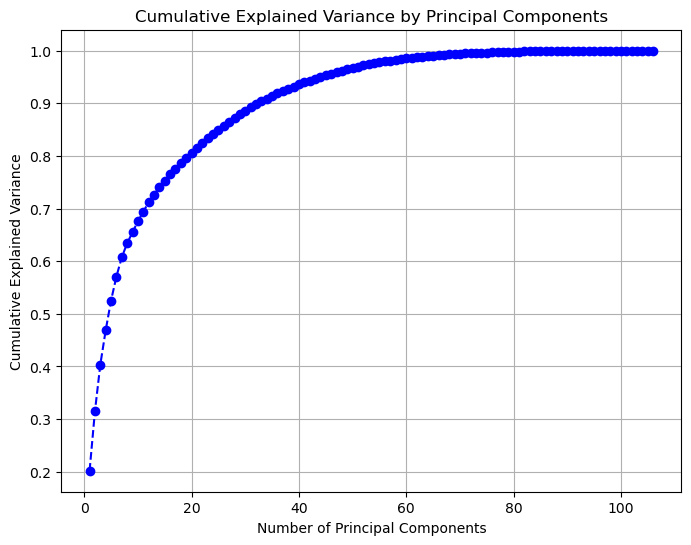

In [19]:
import matplotlib.pyplot as plt

# Cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot the cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='b')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

The first five components explain 50% of the variance.

In [ ]:
# Retain the first 8 components based on the scree plot
num_factors = 8
pca_12 = PCA(n_components=8)
F_train_12 = pca_12.fit_transform(balanced) # It is an array
F_train_12_df = pd.DataFrame(F_train_12, index=balanced.index, columns=[f'Factor_{i+1}' for i in range(num_factors)])


In [21]:
F_train_12_df

,Factor_1,Factor_2,Factor_3,Factor_4,Factor_5,Factor_6,Factor_7,Factor_8
sasdate,,,,,,,,
1962-07-01,-2.430850,3.288939,-6.468471,1.410870,0.772791,-0.029055,-0.901984,0.438726
1962-08-01,-3.106295,2.064480,-5.589702,1.433361,0.190168,-0.888419,-1.985162,1.216483
1962-09-01,-4.347294,1.728258,-4.388553,2.466327,1.120924,-0.994633,-2.222960,-0.462809
1962-10-01,-2.098093,2.928615,-6.965651,-0.585348,0.612791,0.217091,-0.523194,-0.836990
1962-11-01,-2.945525,2.541101,-6.111085,0.473879,-0.572175,-1.052905,-1.874775,2.344298
...,...,...,...,...,...,...,...,...
2019-10-01,2.071037,-0.744045,2.416860,-2.496280,-0.196736,0.045330,-2.475431,0.572766
2019-11-01,2.433603,1.629193,2.740348,-0.809214,0.480843,-0.660092,-0.844145,1.125069
2019-12-01,2.357629,0.541123,2.969504,-1.220142,-0.364273,-0.748274,-2.351318,0.885292


In [ ]:
def manual_pca_standardized(X, num_factors):
    # 1. Since the data is already standardized, we don't need to center it.
    #    Directly compute the covariance matrix from the standardized data.
    covariance_matrix = np.cov(X, rowvar=False)

    # 2. Perform Eigenvalue Decomposition on the covariance matrix
    eigvals, eigvecs = np.linalg.eigh(covariance_matrix)

    # 3. Sort the eigenvalues in descending order, and get the corresponding eigenvectors
    sorted_indices = np.argsort(eigvals)[::-1]
    eigvals_sorted = eigvals[sorted_indices]
    eigvecs_sorted = eigvecs[:, sorted_indices]

    # 4. Select the top 'num_factors' eigenvectors
    selected_eigvecs = eigvecs_sorted[:, :num_factors]

    # 5. Transform the data by projecting it onto the selected eigenvectors
    F = np.dot(X, selected_eigvecs)

    # Convert the results into a DataFrame with appropriate column names
    F_df = pd.DataFrame(F, index=X.index, columns=[f'Factor_{i+1}' for i in range(num_factors)])

    return F_df, eigvals_sorted[:num_factors], selected_eigvecs


num_factors = 8
F_train_12, eigvals, eigvecs = manual_pca_standardized(balanced, num_factors)
F_train_12

,Factor_1,Factor_2,Factor_3,Factor_4,Factor_5,Factor_6,Factor_7,Factor_8
sasdate,,,,,,,,
1962-07-01,2.416050,-3.188035,6.305992,-1.348435,0.736512,0.065724,-0.767882,-0.401182
1962-08-01,3.091496,-1.963577,5.427223,-1.370929,0.153887,0.925096,-1.851201,-1.178756
1962-09-01,4.332494,-1.627355,4.226074,-2.403894,1.084650,1.031296,-2.088563,0.499153
1962-10-01,2.083294,-2.827711,6.803172,0.647782,0.576512,-0.180411,-0.389203,0.875287
1962-11-01,2.930725,-2.440197,5.948606,-0.411447,-0.608458,1.089573,-1.740696,-2.307449
...,...,...,...,...,...,...,...,...
2019-10-01,-2.085837,0.844949,-2.579339,2.558711,-0.233017,-0.008641,-2.341466,-0.534855
2019-11-01,-2.448402,-1.528289,-2.902827,0.871648,0.444558,0.696752,-0.710093,-1.088009
2019-12-01,-2.372429,-0.440219,-3.131984,1.282575,-0.400553,0.784951,-2.217382,-0.847214


**Pure PCA**

In [175]:
def minindc(X):
    ''' =========================================================================
     takes np <-> returns np
     DESCRIPTION
     This function finds the index of the minimum value for each column of a
     given matrix. The function assumes that the minimum value of each column
     occurs only once within that column. The function returns an error if
     this is not the case.

     -------------------------------------------------------------------------
     INPUT
               x   = matrix

     OUTPUT
               pos = column vector with pos(i) containing the row number
                     corresponding to the minimum value of x(:,i)

     ========================================================================= '''

    mins = X.argmin(axis=0) # returns the indices of the minimum values along each column, axis=0 specifies that the operation is done column-wise (for each column).
    assert sum(X == X[mins]) == 1, 'Minimum value occurs more than once.'
    return mins

In [176]:
def baing(X,kmax,jj):
    #take in and return numpy arrays
    ''' =========================================================================
    DESCRIPTION
    This function determines the number of factors to be selected for a given
    dataset using one of three information criteria specified by the user.
    The user also specifies the maximum number of factors to be selected.

    -------------------------------------------------------------------------
    INPUTS
               X       = dataset (one series per column)
               kmax    = an integer indicating the maximum number of factors
                         to be estimated
               jj      = an integer indicating the information criterion used
                         for selecting the number of factors; it can take on
                         the following values:
                               1 (information criterion PC_p1)
                               2 (information criterion PC_p2)
                               3 (information criterion PC_p3)

     OUTPUTS
               ic1     = number of factors selected
               chat    = values of X predicted by the factors
               Fhat    = factors
               eigval  = eivenvalues of X'*X (or X*X' if N>T)

     -------------------------------------------------------------------------
     SUBFUNCTIONS USED

     minindc() - finds the index of the minimum value for each column of a given matrix

     -------------------------------------------------------------------------
     BREAKDOWN OF THE FUNCTION

     Part 1: Setup.

     Part 2: Calculate the overfitting penalty for each possible number of
             factors to be selected (from 1 to kmax).

     Part 3: Select the number of factors that minimizes the specified
             information criterion by utilizing the overfitting penalties calculated in Part 2.

     Part 4: Save other output variables to be returned by the function (chat,
             Fhat, and eigval).

    ========================================================================= '''
    assert kmax <= X.shape[1] and  kmax >= 1 and np.floor(kmax) == kmax or kmax == 99, 'kmax is specified incorrectly'
    assert jj in [1, 2, 3], 'jj is specified incorrectly'


    #  PART 1: SETUP

    T = X.shape[0]  # Number of observations per series (i.e. number of rows)
    N = X.shape[1]  # Number of series (i.e. number of columns)
    NT = N * T      # Total number of observations
    NT1 = N + T     # Number of rows + columns

    #  =========================================================================
    #  PART 2: OVERFITTING PENALTY
    #  Determine penalty for overfitting based on the selected information
    #  criterion.

    CT = np.zeros(kmax) # overfitting penalty
    ii = np.arange(1, kmax + 1)     # Array containing possible number of factors that can be selected (1 to kmax)
    GCT = min(N,T)                  # The smaller of N and T

    # Calculate penalty based on criterion determined by jj.
    if jj == 1:             # Criterion PC_p1
        CT[:] = np.log(NT / NT1) * ii * (NT1 / NT)

    elif jj == 2:             # Criterion PC_p2
        CT[:] = np.log(min(N, T)) * ii * (NT1 / NT)

    elif jj == 3:             # Criterion PC_p3
        CT[:] = np.log(GCT) / GCT * ii

    #  =========================================================================
    #  PART 3: SELECT NUMBER OF FACTORS
    #  Perform principal component analysis on the dataset and select the number
    #  of factors that minimizes the specified information criterion.
    #
    #  -------------------------------------------------------------------------
    #  RUN STANDARD PRINCIPAL COMPONENT ANALYSIS
    #  Get components, loadings, and eigenvalues
    # There are two different cases depending on whether T<N or T≥N. This distinction comes from computational efficiency and numerical stability when 
    # performing Principal Component Analysis (PCA) using Singular Value Decomposition (SVD).
    # PCA is typically performed on the covariance matrix X′X or XX′. The choice of which matrix to use depends on the dimensions of X, specifically whether 
    # T (number of observations) is smaller or larger than N (number of variables). And therefore the order of the matrix in SVD is changed.

    if T < N:
        ev, eigval, V = np.linalg.svd(np.dot(X, X.T))       #  Singular value decomposition
        Fhat0 = ev                               #  Components
        Lambda0 = np.dot(X.T, Fhat0)                    #  Loadings
    else:
        ev, eigval, V = np.linalg.svd(np.dot(X.T, X))       #  Singular value decomposition
        Lambda0 = ev                             #  Loadings
        Fhat0 = np.dot(X, Lambda0)                      #  Components
    #  -------------------------------------------------------------------------

    # SELECT NUMBER OF FACTORS
    # Preallocate memory
    Sigma = np.zeros(kmax + 1)          # sum of squared residuals divided by NT, kmax factors + no factor
    IC1 = np.zeros(kmax + 1)            # information criterion value, kmax factors + no factor

    for i in range(0, kmax) :           # Loop through all possibilites for the number of factors
        Fhat = Fhat0[:, :i+1]           # Identify factors as first i components
        lambda_ = Lambda0[:, :i+1]       #     % Identify factor loadings as first i loadings

        chat = np.dot(Fhat, lambda_.T)      #     % Predict X using i factors
        ehat = X - chat                 # Residuals from predicting X using the factors
        Sigma[i] = ((ehat*ehat/T).sum(axis = 0)).mean()    # Sum of squared residuals divided by NT

        IC1[i] = np.log(Sigma[i]) + CT[i]      #  Value of the information criterion when using i factors


    Sigma[kmax] = (X*X/T).sum(axis = 0).mean()  # Sum of squared residuals when using no factors to predict X (i.e. fitted values are set to 0)

    IC1[kmax] =  np.log(Sigma[kmax]) # % Value of the information criterion when using no factors

    ic1 = minindc(IC1) # % Number of factors that minimizes the information criterion
    # Set ic1=0 if ic1>kmax (i.e. no factors are selected if the value of the
    # information criterion is minimized when no factors are used)
    ic1 = ic1 *(ic1 < kmax) # if = kmax -> 0

    #  =========================================================================
    #  PART 4: SAVE OTHER OUTPUT
    #
    #  Factors and loadings when number of factors set to kmax

    Fhat = Fhat0[:, :kmax] # factors
    Lambda = Lambda0[:, :kmax] #factor loadings

    chat = np.dot(Fhat, Lambda.T) #     Predict X using kmax factors

    return ic1+1, chat, Fhat, eigval
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%


In [177]:
number_factor, estimated_data, factors_balance, pcs_variance = baing(balanced, 4, 2)
factors_balance = pd.DataFrame(factors_balance, index = balanced.index)
number_factor

np.int64(4)

In [178]:
factors_balance

,0,1,2,3
sasdate,,,,
1962-07-01,2.418711,-3.243823,6.297375,-1.318881
1962-08-01,3.093948,-2.015817,5.435545,-1.351130
1962-09-01,4.334594,-1.670850,4.241110,-2.391855
1962-10-01,2.085730,-2.882786,6.783883,0.681543
1962-11-01,2.933170,-2.492886,5.943360,-0.384075
...,...,...,...,...
2019-10-01,-2.086438,0.862803,-2.571406,2.535279
2019-11-01,-2.448567,-1.508989,-2.908778,0.852565
2019-12-01,-2.372798,-0.420062,-3.127862,1.259174


Create the lagged values, training and testing data:

In [ ]:
# Create lagged versions of the factors with renamed columns regarding the original complete dataset
factors_balance_0 = factors_balance.shift(6).add_suffix('_lag1')
factors_balance_1 = factors_balance.shift(7).add_suffix('_lag2')
factors_balance_2 = factors_balance.shift(8).add_suffix('_lag3')
factors_balance_3 = factors_balance.shift(9).add_suffix('_lag4')

# Create lagged versions of the target variable with renamed columns regarding the original complete data set
Y_target = balanced['CMRMTSPLx']
Y_target_1 = Y_target.shift(6).rename('Y_lag1')
Y_target_2 = Y_target.shift(7).rename('Y_lag2')
Y_target_3 = Y_target.shift(8).rename('Y_lag3')
Y_target_4 = Y_target.shift(9).rename('Y_lag4')
Y_target_5 = Y_target.shift(10).rename('Y_lag5')
Y_target_6 = Y_target.shift(11).rename('Y_lag6')
Y_target_7 = Y_target.shift(12).rename('Y_lag7')

# ==============================================================================
# Define train-test split 
train_ratio = 0.9
train_size = int(train_ratio * len(balanced))

# ------------------------------------------------------------------------------
# Training data:
factors_balance_0_train = factors_balance_0.iloc[:train_size]
factors_balance_1_train = factors_balance_1.iloc[:train_size]
factors_balance_2_train = factors_balance_2.iloc[:train_size]
factors_balance_3_train = factors_balance_3.iloc[:train_size]

Y_target_train = Y_target.iloc[:train_size]
Y_train_1 = Y_target_1.iloc[:train_size]
Y_train_2 = Y_target_2.iloc[:train_size]
Y_train_3 = Y_target_3.iloc[:train_size]
Y_train_4 = Y_target_4.iloc[:train_size]
Y_train_5 = Y_target_5.iloc[:train_size]
Y_train_6 = Y_target_6.iloc[:train_size]
Y_train_7 = Y_target_7.iloc[:train_size]

# ------------------------------------------------------------------------------
# Testing data:
factors_balance_0_test = factors_balance_0.iloc[train_size:]
factors_balance_1_test = factors_balance_1.iloc[train_size:]
factors_balance_2_test = factors_balance_2.iloc[train_size:]
factors_balance_3_test = factors_balance_3.iloc[train_size:]

Y_target_test = Y_target.iloc[train_size:]
Y_test_1 = Y_target_1.iloc[train_size:]
Y_test_2 = Y_target_2.iloc[train_size:]
Y_test_3 = Y_target_3.iloc[train_size:]
Y_test_4 = Y_target_4.iloc[train_size:]
Y_test_5 = Y_target_5.iloc[train_size:]
Y_test_6 = Y_target_6.iloc[train_size:]
Y_test_7 = Y_target_7.iloc[train_size:]

**Model: DI-AR, Lag**

In [180]:
import itertools
import statsmodels.api as sm

def best_bic_model(Y_train, factors_balance_0, factors_lags, Y_lags):

    """=========================================================================
    Finds the best regression model by minimizing BIC.
    
    ----------------------------------------------------------------------------
    Parameters:
    
                Y_train (pd.Series): Target variable (dependent variable)
                factors_balance_0 (pd.DataFrame): Baseline explanatory variables (8 factors)
                factors_lags (list of pd.DataFrame): List of lagged factor datasets
                Y_lags (list of pd.Series): List of lagged Y_train series
    
    ----------------------------------------------------------------------------    
    Returns:
                best_model: The best model in order to use it later for predictions
                best_bic: The BIC value of the best model
                best_vars: The specification of the best model
    ========================================================================="""

    # Store all possible lagged variables in a single dictionary
    all_lagged_vars = {'factors_balance_0': factors_balance_0}  # Start with baseline model
    all_lagged_vars.update({f'factors_balance_{i+1}': df for i, df in enumerate(factors_lags)})  # Factor lags
    all_lagged_vars.update({f'Y_train_{i+1}': Y_lag for i, Y_lag in enumerate(Y_lags)})  # Y lags

    # Generate all possible combinations of ONLY lagged variables
    variable_names = list(all_lagged_vars.keys()) # these are the names of the data frames
    variable_names.remove('factors_balance_0')  # Remove base variables from combination set
    all_combinations = []
    for r in range(0, len(variable_names) + 1):  # Start from 0 so we can test the base model (factors_balance_0), this line is used to find all the possible combinations because it generates all possible groups of size r
        for subset in itertools.combinations(variable_names, r): # Create all the specifications of size r and store them in a list (thanks to 'extend')
            all_combinations.append(('factors_balance_0',) + subset)  # Always include base factors

    best_bic = np.inf
    best_model = None
    best_vars = None

    for combination in all_combinations:
        # Concatenate selected variables into a single DataFrame
        selected_vars = [all_lagged_vars[var] for var in combination]
        X = pd.concat(selected_vars, axis=1).dropna()  # Merge and drop NaN rows # axis=1 tells pandas to concatenate them horizontally (column-wise), ie. combine side by side (adds new columns)
        
        Y_train_filtered = Y_train.loc[X.index]  # Align Y_train with X

        # Add constant term
        X = sm.add_constant(X)

        # Fit the regression model
        model = sm.OLS(Y_train_filtered, X).fit()

        # Compute BIC
        bic = model.bic

        # Check if this model has the lowest BIC
        if bic < best_bic:
            best_bic = bic
            best_model = model
            best_vars = combination

    return best_model, best_bic, best_vars


In [181]:
# Example Usage
factors_lags = [factors_balance_1_train, factors_balance_2_train, factors_balance_3_train]
Y_lags = [Y_train_1, Y_train_2, Y_train_3, Y_train_4, Y_train_5, Y_train_6, Y_train_7]

DI_AR_Lag_model, DI_AR_Lag_bic, DI_AR_Lag_specification = best_bic_model(Y_target_train, factors_balance_0_train, factors_lags, Y_lags)

In [182]:
DI_AR_Lag_specification

('factors_balance_0', 'Y_train_6')

In [183]:
DI_AR_Lag_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              CMRMTSPLx   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     6.788
Date:                Sat, 29 Mar 2025   Prob (F-statistic):           3.59e-06
Time:                        13:23:25   Log-Likelihood:                -746.49
No. Observations:                 611   AIC:                             1505.
Df Residuals:                     605   BIC:                             1531.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0214      0.034      0.636      0.525      -0.045       0.088
0_lag1        -0.0142      0.008     -1.750      0.081      -0.030       0.002
1_lag1        -0.0189      0.010     -1.812      0.070      -0.039       0.002
2_lag1         0.0404      0.012      3.357      0.001       0.017       0.064
3_lag1        -0.0324      0.014     -2.353      0.019      -0.059      -0.005
Y_lag6         0.1227      0.040      3.060      0.002       0.044       0.201
==============================================================================
Omnibus:                       13.457   Durbin-Watson:                   2.415
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               24.884
Skew:                          -0.048   Prob(JB):                     3.95e-06
Kurtosis:                       3.984   Cond. No.                         5.02
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [184]:
import statsmodels.stats.sandwich_covariance as sw

def direct_forecast(model, factors_lags_test, Y_lags_test, Y_target_test):

    """============================================================================
    Perform direct forecasts using the estimated regression model.

    -----------------------------------------------------------------------------
    Parameters:
        model (statsmodels OLS object): Estimated model from training.
        factors_lags_test (list of pd.DataFrame): List of test lags for factor balance (including factors_balance_0_test).
        Y_lags_test (list of pd.Series): List of test lags for Y.
        Y_target_test (pd.Series): True values of Y in the test set.

    -----------------------------------------------------------------------------
    Returns:
        pd.Series: Forecasted values indexed like Y_target_test.
        float: Mean Squared Error (printed).
    ============================================================================"""

    # Merge all test variables into a single DataFrame
    X_test = pd.concat(factors_lags_test + Y_lags_test, axis=1).dropna()  # Ensure correct alignment
    X_test = sm.add_constant(X_test)  # Add constant term

    # Ensure test data columns match model's coefficients
    X_test = X_test[model.params.index] # model.params.index gives the names of the variables used in training

    # Make predictions
    forecasts = model.predict(X_test)

    # Compute forecast errors
    errors = Y_target_test.loc[X_test.index] - forecasts

    # Compute MSE
    mse = np.mean(errors ** 2)

    # Compute Newey-West standard error for MSE:
    T = len(errors)  # Sample size
    lag_length = int(np.floor(4 * (T / 100) ** (2 / 9)))  # Automatic lag selection
    # Step 1: Regress squared errors on a constant
    squared_errors = errors**2
    X_const = sm.add_constant(np.ones(T))  # Constant-only regression, the constant term in this regression reflects the mean squared error (MSE)
    hac_model = sm.OLS(squared_errors, X_const).fit(cov_type='HAC', cov_kwds={'maxlags': lag_length})
    # Step 2: Extract standard error of the constant term (which is MSE)
    newey_west_se = np.sqrt(hac_model.bse.iloc[0])  # Standard error of MSE
    # Round results
    newey_west_se = round(newey_west_se, 2)

    # Return forecasts as Pandas Series
    return pd.Series(forecasts, index=X_test.index), mse, newey_west_se

# Function Call:
factors_lags_test = [factors_balance_0_test]
Y_lags_test = [Y_test_6]

DI_AR_Lag_forecast, DI_AR_Lag_MSE, DI_AR_Lag_se = direct_forecast(DI_AR_Lag_model, factors_lags_test, Y_lags_test, Y_target_test)

In [185]:
print(f"{DI_AR_Lag_MSE:.3f}")
print(f"{DI_AR_Lag_se:.2f}")

0.145
0.16


**Model: DI-AR**

In [28]:
number_factor, estimated_data, factors_balance, pcs_variance = baing(balanced, 12, 2)
factors_balance = pd.DataFrame(factors_balance, index = balanced.index)
print(number_factor)

12


We compute again because the factors have changed:

In [29]:
factors_balance_0 = factors_balance.shift(6).add_suffix('_lag1')
factors_balance_0_train = factors_balance_0.iloc[:train_size]
factors_balance_0_test = factors_balance_0.iloc[train_size:]

In [30]:
# Call the function
factors_lags = []
Y_lags = [Y_train_1, Y_train_2, Y_train_3, Y_train_4, Y_train_5, Y_train_6, Y_train_7]

DI_AR_model, DI_AR_bic, DI_AR_specification = best_bic_model(Y_target_train, factors_balance_0_train, factors_lags, Y_lags)

In [31]:
DI_AR_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              CMRMTSPLx   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     3.769
Date:                Sat, 29 Mar 2025   Prob (F-statistic):           7.90e-06
Time:                        11:43:02   Log-Likelihood:                -739.07
No. Observations:                 611   AIC:                             1506.
Df Residuals:                     597   BIC:                             1568.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0182      0.034      0.533      0.594      -0.049       0.085
0_lag1        -0.0132      0.008     -1.604      0.109      -0.029       0.003
1_lag1        -0.0178      0.010     -1.717      0.087      -0.038       0.003
2_lag1         0.0407      0.012      3.384      0.001       0.017       0.064
3_lag1        -0.0332      0.014     -2.417      0.016      -0.060      -0.006
4_lag1         0.0448      0.015      3.036      0.002       0.016       0.074
5_lag1        -0.0023      0.016     -0.141      0.888      -0.034       0.029
6_lag1         0.0109      0.018      0.596      0.552      -0.025       0.047
7_lag1         0.0404      0.021      1.886      0.060      -0.002       0.082
8_lag1         0.0208      0.024      0.854      0.394      -0.027       0.069
9_lag1         0.0022      0.024      0.092      0.927      -0.046       0.050
10_lag1        0.0089      0.026      0.344      0.731      -0.042       0.059
11_lag1       -0.0085      0.027     -0.316      0.752      -0.061       0.044
Y_lag6         0.1319      0.041      3.248      0.001       0.052       0.212
==============================================================================
Omnibus:                       13.562   Durbin-Watson:                   2.455
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               25.583
Skew:                           0.011   Prob(JB):                     2.78e-06
Kurtosis:                       4.002   Cond. No.                         5.17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
factors_lags_test = [factors_balance_0_test]
Y_lags_test = [Y_test_6]
DI_AR_forecast, DI_AR_MSE, DI_AR_se = direct_forecast(DI_AR_model, factors_lags_test, Y_lags_test, Y_target_test)
print(f"{DI_AR_MSE:.3f}")
print(f"{DI_AR_se:.2f}")

0.146
0.17


**Model: DI**

It is the same number of factors.

In [33]:
# Call the function
factors_lags = []
Y_lags = []

DI_model, DI_bic, DI_specification = best_bic_model(Y_target_train, factors_balance_0_train, factors_lags, Y_lags)

In [34]:
DI_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              CMRMTSPLx   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     3.288
Date:                Sat, 29 Mar 2025   Prob (F-statistic):           0.000126
Time:                        11:43:09   Log-Likelihood:                -750.81
No. Observations:                 616   AIC:                             1528.
Df Residuals:                     603   BIC:                             1585.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0243      0.034      0.711      0.477      -0.043       0.092
0_lag1        -0.0121      0.008     -1.464      0.144      -0.028       0.004
1_lag1        -0.0262      0.010     -2.578      0.010      -0.046      -0.006
2_lag1         0.0390      0.012      3.290      0.001       0.016       0.062
3_lag1        -0.0309      0.014     -2.237      0.026      -0.058      -0.004
4_lag1         0.0416      0.015      2.803      0.005       0.012       0.071
5_lag1        -0.0047      0.016     -0.290      0.772      -0.037       0.027
6_lag1         0.0129      0.018      0.704      0.482      -0.023       0.049
7_lag1         0.0357      0.021      1.661      0.097      -0.007       0.078
8_lag1         0.0267      0.024      1.099      0.272      -0.021       0.074
9_lag1         0.0007      0.025      0.029      0.977      -0.047       0.049
10_lag1        0.0005      0.026      0.019      0.985      -0.050       0.051
11_lag1       -0.0085      0.027     -0.316      0.752      -0.062       0.044
==============================================================================
Omnibus:                       14.092   Durbin-Watson:                   2.467
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               26.823
Skew:                           0.033   Prob(JB):                     1.50e-06
Kurtosis:                       4.020   Cond. No.                         4.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
factors_lags_test = [factors_balance_0_test]
Y_lags_test = []
DI_forecast, DI_MSE, DI_se = direct_forecast(DI_model, factors_lags_test, Y_lags_test, Y_target_test)
print(f"{DI_MSE:.3f}")
print(f"{DI_se:.2f}")

0.152
0.17


**Model: LASSO**

In [36]:
from sklearn.linear_model import Lasso, ElasticNet
from group_lasso import GroupLasso
from sklearn.model_selection import GridSearchCV
import warnings
from sklearn.exceptions import ConvergenceWarning
# Suppress the ConvergenceWarning from scikit-learn
warnings.filterwarnings("ignore", category=ConvergenceWarning)

def time_series_regression(dependent_var, regressors, regression_type, groups=None, alpha_range=None, l1_ratio_range=None):
    """
    Perform LASSO, ElasticNet, or Group LASSO regression on time series data with hyperparameter tuning.

    Parameters:
    - dependent_var (pd.Series): The dependent variable (target time series).
    - regressors (pd.DataFrame): The explanatory variables (time series).
    - regression_type (int): The type of regression to perform.
        - 1 = LASSO
        - 2 = ElasticNet
        - 3 = Group LASSO
    - groups (list, optional): List indicating the group of variables for Group LASSO (only required for group lasso).
    - alpha_range (list, optional): List of values to try for the `alpha` parameter (regularization strength).
    - l1_ratio_range (list, optional): List of values to try for the `l1_ratio` parameter (ElasticNet mixing parameter).

    Returns:
    - model: The fitted regression model.
    """
    # Ensure that regressors are a DataFrame and dependent_var is a Series
    X = regressors.copy()
    y = dependent_var.copy()

    # Add constant term ONLY for LASSO and ElasticNet
    if regression_type in [1, 2]:  
        X = sm.add_constant(X)  # Adds intercept column

    # Perform LASSO or ElasticNet or Group LASSO based on regression_type
    if regression_type == 1:  # LASSO
        print("Performing LASSO Regression...")
        model = Lasso()
        
        # Hyperparameter tuning using GridSearchCV
        if alpha_range is not None:
            param_grid = {'alpha': alpha_range}
            grid_search = GridSearchCV(model, param_grid, cv=5)
            grid_search.fit(X, y)
            model = grid_search.best_estimator_

    elif regression_type == 2:  # ElasticNet
        print("Performing ElasticNet Regression...")
        model = ElasticNet()

        # Ensure hyperparameter tuning is happening
        if alpha_range is not None and l1_ratio_range is not None:
            param_grid = {'alpha': alpha_range, 'l1_ratio': l1_ratio_range}
            grid_search = GridSearchCV(model, param_grid, cv=5)
            grid_search.fit(X, y)
            model = grid_search.best_estimator_

            print(f"Best Elastic Net Alpha: {grid_search.best_params_['alpha']}")
            print(f"Best Elastic Net l1_ratio: {grid_search.best_params_['l1_ratio']}")

    elif regression_type == 3:  # Group LASSO
        if groups is None:
            raise ValueError("For Group LASSO, 'groups' must be provided.")
        print("Performing Group LASSO Regression...")
        model = GroupLasso(groups=groups, fit_intercept=False, supress_warning=True) # Set fit_intercept=False when the data is already deamened otherwise set it to True
        
        # Hyperparameter tuning using GridSearchCV
        if alpha_range is not None:
            param_grid = {'l1_reg': alpha_range}
            grid_search = GridSearchCV(model, param_grid, cv=5)
            grid_search.fit(X, y)
            model = grid_search.best_estimator_

    else:
        raise ValueError("Invalid regression_type. Use 1 for LASSO, 2 for ElasticNet, or 3 for Group LASSO.")
    
    print(f"Best model parameters: {model.get_params()}")
    return model

# Penalization parameters
alpha_range = np.logspace(-5, 5, 50)
l1_ratio_range = np.linspace(0.1, 1.0, 15)

In [37]:
balanced_lagged = balanced.shift(6)
balanced_lagged_train = balanced_lagged.iloc[:train_size].dropna()
balanced_lagged_test = balanced_lagged.iloc[train_size:]
Y_target_train_adjusted = Y_target_train.loc[balanced_lagged_train.index]

In [38]:
model_lasso = time_series_regression(dependent_var = Y_target_train_adjusted, regressors = balanced_lagged_train, 
                               regression_type=1, alpha_range=alpha_range, l1_ratio_range=l1_ratio_range)

Performing LASSO Regression...
Best model parameters: {'alpha': np.float64(0.04714866363457394), 'copy_X': True, 'fit_intercept': True, 'max_iter': 1000, 'positive': False, 'precompute': False, 'random_state': None, 'selection': 'cyclic', 'tol': 0.0001, 'warm_start': False}


In [39]:
from sklearn.metrics import mean_squared_error

def direct_forecast_2(model, regressor, target):
    """
    Perform direct forecasting using a trained model (LASSO, ElasticNet, or Group LASSO).
    
    Parameters:
    - model: The trained regression model (LASSO, ElasticNet, or Group LASSO).
    - balanced_lagged_test (pd.DataFrame): The test set regressors (lagged factors).
    - Y_target_test (pd.Series): The true values of the dependent variable for the test set.
    
    Returns:
    - forecasted_values (pd.Series): Forecasted values indexed the same as Y_target_test.
    - mse (float): Mean squared error of the forecasts.
    """
    
    # Add constant to the test data (intercept term for regression)
    X_test = sm.add_constant(regressor)

    # Make predictions using the model
    forecasts = model.predict(X_test)

    # Calculate the MSE (Mean Squared Error)
    mse = mean_squared_error(Y_target_test, forecasts)
    print(f"Mean Squared Error (MSE): {mse:.3f}")

    # Return the forecasted values as a Pandas Series
    forecasted_values = pd.Series(forecasts, index=target.index)
    
    return forecasted_values, mse

In [40]:
# Now use the model to forecast on the test data
forecasted_lasso, mse_lasso = direct_forecast_2(model_lasso, balanced_lagged_test, Y_target_test)

Mean Squared Error (MSE): 0.160


**Elastic Net**

In [50]:
model_elastic_net = time_series_regression(dependent_var = Y_target_train_adjusted, regressors = balanced_lagged_train, 
                               regression_type=2, alpha_range=alpha_range, l1_ratio_range=l1_ratio_range)

Performing ElasticNet Regression...
Best Elastic Net Alpha: 0.1206792640639329
Best Elastic Net l1_ratio: 0.3571428571428572
Best model parameters: {'alpha': np.float64(0.1206792640639329), 'copy_X': True, 'fit_intercept': True, 'l1_ratio': np.float64(0.3571428571428572), 'max_iter': 1000, 'positive': False, 'precompute': False, 'random_state': None, 'selection': 'cyclic', 'tol': 0.0001, 'warm_start': False}


In [51]:
# Now use the model to forecast on the test data
forecasted_elastic_net, mse_elastic_net = direct_forecast_2(model_elastic_net, balanced_lagged_test, Y_target_test)

Mean Squared Error (MSE): 0.160


**Group Lasso**

In [41]:
def construct_groups(balanced_lagged_train):
    """
    Construct the 'groups' array for Group LASSO based on predefined economic indicator groups.

    Parameters:
    - balanced_lagged_train (pd.DataFrame): DataFrame containing the regressors.

    Returns:
    - groups (np.array): An array of group assignments corresponding to the columns of balanced_lagged_train.
    """
    # Define groups with variable names
    group_dict = {
        1: ["RPI", "W875RX1", "INDPRO", "IPFPNSS", "IPFINAL", "IPCONGD", "IPDCONGD", "IPNCONGD", "IPBUSEQ",
            "IPMAT", "IPDMAT", "IPNMAT", "IPMANSICS", "IPB51222s", "IPFUELS", "CUMFNS"],
        2: ["HWI", "HWIURATIO", "CLF16OV", "CE16OV", "UNRATE", "UEMPMEAN", "UEMPLT5", "UEMP5TO14", "UEMP15OV",
            "UEMP15T26", "UEMP27OV", "CLAIMSx", "PAYEMS", "USGOOD", "CES1021000001", "USCONS", "MANEMP",
            "DMANEMP", "NDMANEMP", "SRVPRD", "USTPU", "USWTRADE", "USTRADE", "USFIRE", "USGOVT",
            "CES0600000007", "AWOTMAN", "AWHMAN", "CES0600000008", "CES2000000008", "CES3000000008"],
        3: ["HOUST", "HOUSTNE", "HOUSTMW", "HOUSTS", "HOUSTW", "PERMIT", "PERMITNE", "PERMITMW", "PERMITS", "PERMITW"],
        4: ["DPCERA3M086SBEA", "CMRMTSPLx", "RETAILx", "ACOGNO", "AMDMNOx", "ANDENOx", "AMDMUOx", "BUSINVx",
            "ISRATIOx", "UMCSENTx"],
        5: ["M1SL", "M2SL", "M2REAL", "BOGMBASE", "TOTRESNS", "NONBORRES", "BUSLOANS", "REALLN", "NONREVSL",
            "CONSPI", "DTCOLNVHFNM", "DTCTHFNM", "INVEST"],
        6: ["FEDFUNDS", "CP3Mx", "TB3MS", "TB6MS", "GS1", "GS5", "GS10", "AAA", "BAA", "COMPAPFFx",
            "TB3SMFFM", "TB6SMFFM", "T1YFFM", "T5YFFM", "T10YFFM", "AAAFFM", "BAAFFM", "TWEXAFEGSMTHx",
            "EXSZUSx", "EXJPUSx", "EXUSUKx", "EXCAUSx"],
        7: ["WPSFD49207", "WPSFD49502", "WPSID61", "WPSID62", "OILPRICEx", "PPICMM", "CPIAUCSL", "CPIAPPSL",
            "CPITRNSL", "CPIMEDSL", "CUSR0000SAC", "CUSR0000SAD", "CUSR0000SAS", "CPIULFSL", "CUSR0000SA0L2",
            "CUSR0000SA0L5", "PCEPI", "DDURRG3M086SBEA", "DNDGRG3M086SBEA", "DSERRG3M086SBEA"],
        8: ["S&P 500", "S&P div yield", "S&P PE ratio", "VIXCLSx"]
    }

    # Extract the columns of the dataset
    dataset_columns = balanced_lagged_train.columns.tolist()

    # Initialize an empty array to store group assignments
    groups = np.zeros(len(dataset_columns), dtype=int)

    # Assign each variable to a group if it exists in `balanced_lagged_train`
    for group_num, variables in group_dict.items():
        for var in variables:
            if var in dataset_columns:
                groups[dataset_columns.index(var)] = group_num

    # Ensure all variables are assigned a group
    if np.any(groups == 0):
        print("Warning: Some variables in the dataset were not assigned to any group.")

    return groups

# function call
groups = construct_groups(balanced_lagged_train)


In [42]:
import pandas as pd

def compute_group_proportions(groups):
    """
    Compute and display the proportion of variables assigned to each group.

    Parameters:
    - groups (np.array): Array of group assignments for variables.

    Returns:
    - group_proportions (pd.DataFrame): DataFrame showing group counts and proportions.
    """
    # Count occurrences of each group
    unique_groups, counts = np.unique(groups, return_counts=True)

    # Compute proportions
    total_vars = len(groups)
    proportions = counts / total_vars

    # Create a DataFrame for readability
    group_proportions = pd.DataFrame({
        'Group': unique_groups,
        'Count': counts,
        'Proportion': proportions
    })

    # Sort by group number
    group_proportions = group_proportions.sort_values(by='Group')

    return group_proportions

# Compute and display proportions
group_proportions = compute_group_proportions(groups)
print(group_proportions)


   Group  Count  Proportion
0      0      1    0.009434
1      1     14    0.132075
2      2     30    0.283019
3      3     10    0.094340
4      4      6    0.056604
5      5      7    0.066038
6      6     17    0.160377
7      7     17    0.160377
8      8      4    0.037736


Only one variable has no group.

In [54]:
model_group_lasso = time_series_regression(dependent_var = Y_target_train_adjusted, regressors = balanced_lagged_train, 
                               regression_type=3, alpha_range=alpha_range, l1_ratio_range=l1_ratio_range, groups=groups)

Performing Group LASSO Regression...
Best model parameters: {'fit_intercept': False, 'frobenius_lipschitz': False, 'group_reg': 0.05, 'groups': array([1, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 5, 5, 5, 5, 5, 5, 8, 8,
       8, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 2, 2, 2, 5, 8]), 'l1_reg': np.float64(1e-05), 'n_iter': 100, 'old_regularisation': False, 'random_state': None, 'scale_reg': 'group_size', 'subsampling_scheme': None, 'supress_warning': True, 'tol': 1e-05, 'warm_start': False}


In [55]:
# Now use the model to forecast on the test data
forecasted_group_lasso, mse_group_lasso = direct_forecast_2(model_group_lasso, balanced_lagged_test, Y_target_test)

Mean Squared Error (MSE): 0.152


**Forecast combining regression** with Heteroskedasticity and Autocorrelation Robust (HAC) standard errors using the Newey-West estimator:

In [43]:
def forecast_combining_regression(forecast_1, forecast_2, y_actual, max_lags=5):
    """
    Performs a forecast combination regression:
    
        Y_target_test = alpha * forecast_1 + (1 - alpha) * forecast_2 + error
    
    with heteroskedasticity and autocorrelation robust (HAC) standard errors.

    Parameters:
    - forecast_1 (pd.DataFrame or pd.Series): First forecast (e.g., from Group LASSO).
    - forecast_2 (pd.DataFrame or pd.Series): Second forecast (e.g., from DI_AR_Lag model).
    - y_actual (pd.DataFrame or pd.Series): Actual target values.
    - max_lags (int, optional): Number of lags for HAC standard errors (default: 5 -> already seen on internet by finance people).
    
    Returns:
    - alpha (float): Estimated weight for forecast_1.
    - p_value (float): P-value of alpha.
    """
    
    # Ensure inputs are Pandas Series
    forecast_1 = forecast_1.squeeze()
    forecast_2 = forecast_2.squeeze()
    y_actual = y_actual.squeeze()
    
    # Create the usual regression structure: Y = alpha * forecast_1 + (1 - alpha) * forecast_2
    X = forecast_1.to_frame(name="forecast_1")  # Independent variable: forecast_1
    X["forecast_2"] = forecast_2  # Independent variable: forecast_2
    
    # Add constant (intercept)
    X = sm.add_constant(X)
    
    # Fit OLS regression with HAC robust standard errors
    model = sm.OLS(y_actual, X).fit(cov_type='HAC', cov_kwds={'maxlags': max_lags})
    
    # Extract alpha estimate and p-value (for forecast_1)
    alpha = model.params["forecast_1"]
    p_value = model.pvalues["forecast_1"]
    
    return alpha, p_value

In [57]:
alpha_hat, p_val = forecast_combining_regression(DI_AR_forecast, DI_AR_Lag_forecast, Y_target_test)
print(f"Estimated alpha: {alpha_hat:.2f}")
print(f"P-value: {p_val:.2f}")

Estimated alpha: -0.30
P-value: 0.68


In [58]:
alpha_hat, p_val = forecast_combining_regression(DI_forecast, DI_AR_Lag_forecast, Y_target_test)
print(f"Estimated alpha: {alpha_hat:.2f}")
print(f"P-value: {p_val:.2f}")

Estimated alpha: -0.24
P-value: 0.77


In [59]:
alpha_hat, p_val = forecast_combining_regression(forecasted_lasso, DI_AR_Lag_forecast, Y_target_test)
print(f"Estimated alpha: {alpha_hat:.2f}")
print(f"P-value: {p_val:.2f}")

Estimated alpha: -0.49
P-value: 0.65


In [60]:
alpha_hat, p_val = forecast_combining_regression(forecasted_elastic_net, DI_AR_Lag_forecast, Y_target_test)
print(f"Estimated alpha: {alpha_hat:.2f}")
print(f"P-value: {p_val:.2f}")

Estimated alpha: -0.37
P-value: 0.72


In [61]:
alpha_hat, p_val = forecast_combining_regression(forecasted_group_lasso, DI_AR_Lag_forecast, Y_target_test)
print(f"Estimated alpha: {alpha_hat:.2f}")
print(f"P-value: {p_val:.2f}")

Estimated alpha: 109.19
P-value: 0.01


### The stacked balanced data

In [44]:
number_factor, estimated_data, factors_stack_balance, pcs_variance = baing(stacked_balanced, 4, 2)
factors_stack_balance= pd.DataFrame(factors_stack_balance, index = stacked_balanced.index)
number_factor

np.int64(4)

In [45]:
factors_stack_balance

,0,1,2,3
sasdate,,,,
1962-08-01,4.235530,-3.190213,8.678066,0.435747
1962-09-01,5.461861,-2.265202,7.412822,-0.453765
1962-10-01,4.848141,-2.722581,8.013966,1.069665
1962-11-01,3.944725,-3.244271,8.990376,2.110172
1962-12-01,4.189962,-2.890795,8.880881,1.744444
...,...,...,...,...
2019-10-01,-3.607227,0.088312,-3.839854,3.237828
2019-11-01,-3.330456,-0.860262,-3.976584,1.678136
2019-12-01,-3.519861,-1.802092,-4.197273,1.090795


Create the lagged values, training and testing data:

In [ ]:
# Create lagged versions of the factors with renamed columns regarding the original complete dataset
factors_balance_0 = factors_stack_balance.shift(6).add_suffix('_lag1')
factors_balance_1 = factors_stack_balance.shift(7).add_suffix('_lag2')
factors_balance_2 = factors_stack_balance.shift(8).add_suffix('_lag3')
factors_balance_3 = factors_stack_balance.shift(9).add_suffix('_lag4')

Y_target = stacked_balanced['CMRMTSPLx']
Y_target_1 = Y_target.shift(6).rename('Y_lag1')
Y_target_2 = Y_target.shift(7).rename('Y_lag2')
Y_target_3 = Y_target.shift(8).rename('Y_lag3')
Y_target_4 = Y_target.shift(9).rename('Y_lag4')
Y_target_5 = Y_target.shift(10).rename('Y_lag5')
Y_target_6 = Y_target.shift(11).rename('Y_lag6')
Y_target_7 = Y_target.shift(12).rename('Y_lag7')

# ==============================================================================
# Define train-test split 
train_ratio = 0.9
train_size = int(train_ratio * len(stacked_balanced))

# ------------------------------------------------------------------------------
# Training data:
factors_balance_0_train = factors_balance_0.iloc[:train_size]
factors_balance_1_train = factors_balance_1.iloc[:train_size]
factors_balance_2_train = factors_balance_2.iloc[:train_size]
factors_balance_3_train = factors_balance_3.iloc[:train_size]

Y_target_train = Y_target.iloc[:train_size]
Y_train_1 = Y_target_1.iloc[:train_size]
Y_train_2 = Y_target_2.iloc[:train_size]
Y_train_3 = Y_target_3.iloc[:train_size]
Y_train_4 = Y_target_4.iloc[:train_size]
Y_train_5 = Y_target_5.iloc[:train_size]
Y_train_6 = Y_target_6.iloc[:train_size]
Y_train_7 = Y_target_7.iloc[:train_size]

# ------------------------------------------------------------------------------
# Testing data:
factors_balance_0_test = factors_balance_0.iloc[train_size:]
factors_balance_1_test = factors_balance_1.iloc[train_size:]
factors_balance_2_test = factors_balance_2.iloc[train_size:]
factors_balance_3_test = factors_balance_3.iloc[train_size:]

Y_target_test = Y_target.iloc[train_size:]
Y_test_1 = Y_target_1.iloc[train_size:]
Y_test_2 = Y_target_2.iloc[train_size:]
Y_test_3 = Y_target_3.iloc[train_size:]
Y_test_4 = Y_target_4.iloc[train_size:]
Y_test_5 = Y_target_5.iloc[train_size:]
Y_test_6 = Y_target_6.iloc[train_size:]
Y_test_7 = Y_target_7.iloc[train_size:]

In [47]:
# Example Usage
factors_lags = [factors_balance_1_train, factors_balance_2_train, factors_balance_3_train]
Y_lags = [Y_train_1, Y_train_2, Y_train_3, Y_train_4, Y_train_5, Y_train_6, Y_train_7]

DI_AR_Lag_model, DI_AR_Lag_bic, DI_AR_Lag_specification = best_bic_model(Y_target_train, factors_balance_0_train, factors_lags, Y_lags)

In [48]:
DI_AR_Lag_specification

('factors_balance_0', 'Y_train_6')

In [49]:
DI_AR_Lag_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              CMRMTSPLx   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     7.911
Date:                Sat, 29 Mar 2025   Prob (F-statistic):           3.12e-07
Time:                        11:44:18   Log-Likelihood:                -742.04
No. Observations:                 610   AIC:                             1496.
Df Residuals:                     604   BIC:                             1523.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0199      0.034      0.590      0.555      -0.046       0.086
0_lag1        -0.0088      0.006     -1.505      0.133      -0.020       0.003
1_lag1        -0.0130      0.008     -1.725      0.085      -0.028       0.002
2_lag1         0.0363      0.009      4.173      0.000       0.019       0.053
3_lag1        -0.0256      0.011     -2.430      0.015      -0.046      -0.005
Y_lag6         0.1193      0.040      2.978      0.003       0.041       0.198
==============================================================================
Omnibus:                       13.988   Durbin-Watson:                   2.425
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               26.424
Skew:                          -0.045   Prob(JB):                     1.83e-06
Kurtosis:                       4.016   Cond. No.                         7.04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
# Function Call:
factors_lags_test = [factors_balance_0_test]
Y_lags_test = [Y_test_6]

DI_AR_Lag_forecast, DI_AR_Lag_MSE, DI_AR_Lag_se = direct_forecast(DI_AR_Lag_model, factors_lags_test, Y_lags_test, Y_target_test)

In [51]:
print(f"{DI_AR_Lag_MSE:.3f}")
print(f"{DI_AR_Lag_se:.2f}")

0.142
0.16


**Model: DI-AR**

In [52]:
number_factor, estimated_data, factors_stack_balance, pcs_variance = baing(stacked_balanced, 12, 2)
factors_stack_balance = pd.DataFrame(factors_stack_balance, index = stacked_balanced.index)
print(number_factor)

12


In [53]:
factors_balance_0 = factors_stack_balance.shift(6).add_suffix('_lag1')
factors_balance_0_train = factors_balance_0.iloc[:train_size]
factors_balance_0_test = factors_balance_0.iloc[train_size:]

In [54]:
# Call the function
factors_lags = []
Y_lags = [Y_train_1, Y_train_2, Y_train_3, Y_train_4, Y_train_5, Y_train_6, Y_train_7]

DI_AR_model, DI_AR_bic, DI_AR_specification = best_bic_model(Y_target_train, factors_balance_0_train, factors_lags, Y_lags)

In [55]:
DI_AR_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              CMRMTSPLx   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     3.915
Date:                Sat, 29 Mar 2025   Prob (F-statistic):           1.94e-06
Time:                        11:44:40   Log-Likelihood:                -734.51
No. Observations:                 610   AIC:                             1499.
Df Residuals:                     595   BIC:                             1565.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.034      0.556      0.579      -0.048       0.086
0_lag1        -0.0076      0.006     -1.298      0.195      -0.019       0.004
1_lag1        -0.0235      0.009     -2.737      0.006      -0.040      -0.007
2_lag1         0.0364      0.009      4.184      0.000       0.019       0.054
3_lag1        -0.0328      0.011     -3.018      0.003      -0.054      -0.011
4_lag1         0.0136      0.011      1.252      0.211      -0.008       0.035
5_lag1        -0.0053      0.014     -0.388      0.698      -0.032       0.022
6_lag1        -0.0153      0.016     -0.983      0.326      -0.046       0.015
7_lag1        -0.0113      0.018     -0.642      0.521      -0.046       0.023
8_lag1        -0.0042      0.018     -0.233      0.816      -0.040       0.031
9_lag1         0.0200      0.020      0.981      0.327      -0.020       0.060
10_lag1        0.0419      0.020      2.139      0.033       0.003       0.080
11_lag1        0.0336      0.022      1.555      0.121      -0.009       0.076
Y_lag2        -0.1555      0.057     -2.721      0.007      -0.268      -0.043
Y_lag6         0.1059      0.042      2.546      0.011       0.024       0.188
==============================================================================
Omnibus:                       14.914   Durbin-Watson:                   2.451
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               29.207
Skew:                          -0.039   Prob(JB):                     4.55e-07
Kurtosis:                       4.069   Cond. No.                         10.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
factors_lags_test = [factors_balance_0_test]
Y_lags_test = [Y_test_2, Y_test_6]
DI_AR_forecast, DI_AR_MSE, DI_AR_se = direct_forecast(DI_AR_model, factors_lags_test, Y_lags_test, Y_target_test)
print(f"{DI_AR_MSE:.3f}")
print(f"{DI_AR_se:.2f}")

0.139
0.17


Visualization in original scale:

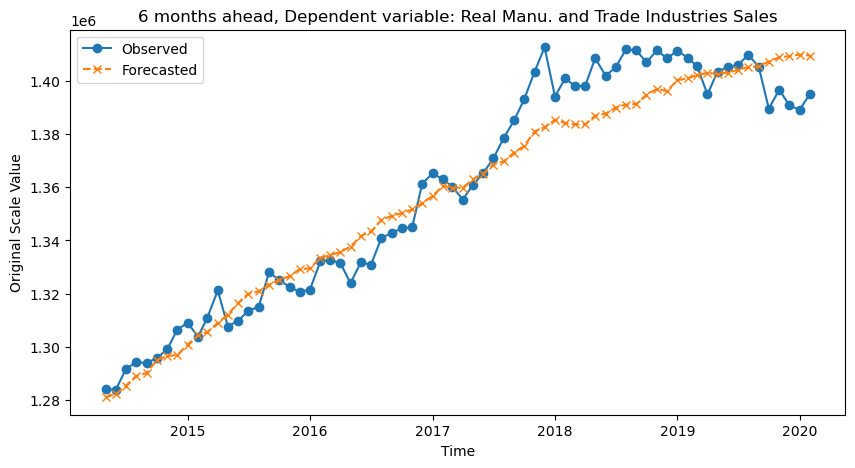

In [ ]:
# ---- Undo Standardization ----
Z_forecast = DI_AR_forecast * std_diff + mean_diff
Z_observed = Y_target_test * std_diff + mean_diff  # Undo standardization for Y_target_test

# ---- Undo Differencing ----
# Get the last observed log-transformed value from training data
Y_last = np.log(memo.loc['2014-04-01'])  # The last value before forecasting

# Reverse differencing for forecast
Y_forecast = np.cumsum(np.insert(Z_forecast, 0, Y_last))  # Insert last known value
Y_forecast = Y_forecast[1:]  # Remove the first value (it was just for initialization)

# Reverse differencing for observed data
Y_observed = np.cumsum(np.insert(Z_observed, 0, Y_last))  # Using same last value
Y_observed = Y_observed[1:]

# ---- Undo Log Transformation ----
X_forecast = np.exp(Y_forecast)  # Convert back to original scale
X_observed = np.exp(Y_observed)  # Convert observed back to original scale

# ---- Compare Forecasted vs Observed ----
comparison_df = pd.DataFrame({
    'Observed': X_observed,
    'Forecasted': X_forecast
}, index=Y_target_test.index)

# ---- Plot the results ----
plt.figure(figsize=(10, 5))
plt.plot(comparison_df.index, comparison_df['Observed'], label='Observed', marker='o')
plt.plot(comparison_df.index, comparison_df['Forecasted'], label='Forecasted', linestyle='dashed', marker='x')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Original Scale Value')
plt.title('6 months ahead, Dependent variable: Real Manu. and Trade Industries Sales')
plt.show()

**Model: DI**

In [77]:
# Call the function
factors_lags = []
Y_lags = []

DI_model, DI_bic, DI_specification = best_bic_model(Y_target_train, factors_balance_0_train, factors_lags, Y_lags)

In [78]:
DI_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              CMRMTSPLx   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     2.979
Date:                Fri, 28 Mar 2025   Prob (F-statistic):           0.000466
Time:                        18:37:08   Log-Likelihood:                -751.29
No. Observations:                 615   AIC:                             1529.
Df Residuals:                     602   BIC:                             1586.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0191      0.034      0.555      0.579      -0.049       0.087
0_lag1        -0.0078      0.006     -1.309      0.191      -0.019       0.004
1_lag1        -0.0182      0.007     -2.461      0.014      -0.033      -0.004
2_lag1         0.0335      0.009      3.889      0.000       0.017       0.050
3_lag1        -0.0250      0.011     -2.332      0.020      -0.046      -0.004
4_lag1         0.0154      0.011      1.429      0.154      -0.006       0.037
5_lag1        -0.0046      0.014     -0.333      0.740      -0.032       0.023
6_lag1        -0.0055      0.015     -0.374      0.709      -0.035       0.024
7_lag1         0.0103      0.017      0.610      0.542      -0.023       0.043
8_lag1        -0.0150      0.018     -0.840      0.401      -0.050       0.020
9_lag1        -0.0012      0.018     -0.067      0.947      -0.037       0.035
10_lag1        0.0282      0.020      1.443      0.149      -0.010       0.067
11_lag1        0.0060      0.020      0.295      0.768      -0.034       0.046
==============================================================================
Omnibus:                       13.825   Durbin-Watson:                   2.474
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               26.291
Skew:                           0.003   Prob(JB):                     1.95e-06
Kurtosis:                       4.013   Cond. No.                         6.04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [79]:
factors_lags_test = [factors_balance_0_test]
Y_lags_test = []
DI_forecast, DI_MSE, DI_se = direct_forecast(DI_model, factors_lags_test, Y_lags_test, Y_target_test)
print(f"{DI_MSE:.3f}")
print(f"{DI_se:.2f}")

0.141
0.16


**Model: LASSO**

In [80]:
balanced_lagged = stacked_balanced.shift(6)
balanced_lagged_train = balanced_lagged.iloc[:train_size].dropna()
balanced_lagged_test = balanced_lagged.iloc[train_size:]
Y_target_train_adjusted = Y_target_train.loc[balanced_lagged_train.index]

In [81]:
model_lasso = time_series_regression(dependent_var = Y_target_train_adjusted, regressors = balanced_lagged_train, 
                               regression_type=1, alpha_range=alpha_range, l1_ratio_range=l1_ratio_range)

Performing LASSO Regression...
Best model parameters: {'alpha': np.float64(0.04714866363457394), 'copy_X': True, 'fit_intercept': True, 'max_iter': 1000, 'positive': False, 'precompute': False, 'random_state': None, 'selection': 'cyclic', 'tol': 0.0001, 'warm_start': False}


In [82]:
# Now use the model to forecast on the test data
forecasted_lasso, mse_lasso = direct_forecast_2(model_lasso, balanced_lagged_test, Y_target_test)

Mean Squared Error (MSE): 0.159


**Elastic Net**

In [83]:
model_elastic_net = time_series_regression(dependent_var = Y_target_train_adjusted, regressors = balanced_lagged_train, 
                               regression_type=2, alpha_range=alpha_range, l1_ratio_range=l1_ratio_range)

Performing ElasticNet Regression...
Best Elastic Net Alpha: 0.49417133613238384
Best Elastic Net l1_ratio: 0.1
Best model parameters: {'alpha': np.float64(0.49417133613238384), 'copy_X': True, 'fit_intercept': True, 'l1_ratio': np.float64(0.1), 'max_iter': 1000, 'positive': False, 'precompute': False, 'random_state': None, 'selection': 'cyclic', 'tol': 0.0001, 'warm_start': False}


In [84]:
# Now use the model to forecast on the test data
forecasted_elastic_net, mse_elastic_net = direct_forecast_2(model_elastic_net, balanced_lagged_test, Y_target_test)

Mean Squared Error (MSE): 0.160


**Group LASSO**

In [85]:
def construct_groups_stacked(balanced_lagged_train):
    """
    Construct the 'groups' array for Group LASSO, ensuring that lagged variables
    are included in the same groups as their original counterparts.

    Parameters:
    - balanced_lagged_train (pd.DataFrame): DataFrame containing the regressors.

    Returns:
    - groups (np.array): An array of group assignments corresponding to the columns of balanced_lagged_train.
    """
    # Define groups with original variable names
    group_dict = {
        1: ["RPI", "W875RX1", "INDPRO", "IPFPNSS", "IPFINAL", "IPCONGD", "IPDCONGD", "IPNCONGD", "IPBUSEQ",
            "IPMAT", "IPDMAT", "IPNMAT", "IPMANSICS", "IPB51222s", "IPFUELS", "CUMFNS"],
        2: ["HWI", "HWIURATIO", "CLF16OV", "CE16OV", "UNRATE", "UEMPMEAN", "UEMPLT5", "UEMP5TO14", "UEMP15OV",
            "UEMP15T26", "UEMP27OV", "CLAIMSx", "PAYEMS", "USGOOD", "CES1021000001", "USCONS", "MANEMP",
            "DMANEMP", "NDMANEMP", "SRVPRD", "USTPU", "USWTRADE", "USTRADE", "USFIRE", "USGOVT",
            "CES0600000007", "AWOTMAN", "AWHMAN", "CES0600000008", "CES2000000008", "CES3000000008"],
        3: ["HOUST", "HOUSTNE", "HOUSTMW", "HOUSTS", "HOUSTW", "PERMIT", "PERMITNE", "PERMITMW", "PERMITS", "PERMITW"],
        4: ["DPCERA3M086SBEA", "CMRMTSPLx", "RETAILx", "ACOGNO", "AMDMNOx", "ANDENOx", "AMDMUOx", "BUSINVx",
            "ISRATIOx", "UMCSENTx"],
        5: ["M1SL", "M2SL", "M2REAL", "BOGMBASE", "TOTRESNS", "NONBORRES", "BUSLOANS", "REALLN", "NONREVSL",
            "CONSPI", "DTCOLNVHFNM", "DTCTHFNM", "INVEST"],
        6: ["FEDFUNDS", "CP3Mx", "TB3MS", "TB6MS", "GS1", "GS5", "GS10", "AAA", "BAA", "COMPAPFFx",
            "TB3SMFFM", "TB6SMFFM", "T1YFFM", "T5YFFM", "T10YFFM", "AAAFFM", "BAAFFM", "TWEXAFEGSMTHx",
            "EXSZUSx", "EXJPUSx", "EXUSUKx", "EXCAUSx"],
        7: ["WPSFD49207", "WPSFD49502", "WPSID61", "WPSID62", "OILPRICEx", "PPICMM", "CPIAUCSL", "CPIAPPSL",
            "CPITRNSL", "CPIMEDSL", "CUSR0000SAC", "CUSR0000SAD", "CUSR0000SAS", "CPIULFSL", "CUSR0000SA0L2",
            "CUSR0000SA0L5", "PCEPI", "DDURRG3M086SBEA", "DNDGRG3M086SBEA", "DSERRG3M086SBEA"],
        8: ["S&P 500", "S&P div yield", "S&P PE ratio", "VIXCLSx"]
    }

    # Extract dataset columns
    dataset_columns = balanced_lagged_train.columns.tolist()

    # Initialize an empty array for group assignments
    groups = np.zeros(len(dataset_columns), dtype=int)

    # Map original variables to groups
    variable_to_group = {}
    for group_num, variables in group_dict.items():
        for var in variables:
            variable_to_group[var] = group_num

    # Assign each variable and its lag to the correct group
    for i, var in enumerate(dataset_columns):
        base_var = var.replace("_lag", "")  # Remove "_lag" to get the base variable name
        if base_var in variable_to_group:
            groups[i] = variable_to_group[base_var]

    # Ensure all variables are assigned a group
    if np.any(groups == 0):
        print("Warning: Some variables in the dataset were not assigned to any group.")

    return groups

In [86]:
# Function call
groups = construct_groups_stacked(balanced_lagged_train)

In [87]:
group_proportions = compute_group_proportions(groups)
print(group_proportions)

   Group  Count  Proportion
0      0      2    0.009434
1      1     28    0.132075
2      2     60    0.283019
3      3     20    0.094340
4      4     12    0.056604
5      5     14    0.066038
6      6     34    0.160377
7      7     34    0.160377
8      8      8    0.037736


In [88]:
model_group_lasso = time_series_regression(dependent_var = Y_target_train_adjusted, regressors = balanced_lagged_train, 
                               regression_type=3, alpha_range=alpha_range, l1_ratio_range=l1_ratio_range, groups=groups)

Performing Group LASSO Regression...
Best model parameters: {'fit_intercept': False, 'frobenius_lipschitz': False, 'group_reg': 0.05, 'groups': array([1, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 5, 5, 5, 5, 5, 5, 8, 8,
       8, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 2, 2, 2, 5, 8, 1, 4, 4, 4,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 5, 5, 5, 5, 5, 5, 8, 8, 8, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 2, 2, 2, 5, 8]), 'l1_reg': np.float64(1.5998587196060572e-05), 'n_iter': 100, 'old_regularisation': False, 'random_state': None, 'scale_reg': 'group_size', 'subsampl

In [89]:
# Now use the model to forecast on the test data
forecasted_group_lasso, mse_group_lasso = direct_forecast_2(model_group_lasso, balanced_lagged_test, Y_target_test)

Mean Squared Error (MSE): 0.152


**Forecast combining regression** with Heteroskedasticity and Autocorrelation Robust (HAC) standard errors using the Newey-West estimator:

In [90]:
alpha_hat, p_val = forecast_combining_regression(DI_AR_forecast, DI_AR_Lag_forecast, Y_target_test)
print(f"Estimated alpha: {alpha_hat:.2f}")
print(f"P-value: {p_val:.2f}")

Estimated alpha: 0.75
P-value: 0.23


In [91]:
alpha_hat, p_val = forecast_combining_regression(DI_forecast, DI_AR_Lag_forecast, Y_target_test)
print(f"Estimated alpha: {alpha_hat:.2f}")
print(f"P-value: {p_val:.2f}")

Estimated alpha: 1.46
P-value: 0.05


In [92]:
alpha_hat, p_val = forecast_combining_regression(forecasted_lasso, DI_AR_Lag_forecast, Y_target_test)
print(f"Estimated alpha: {alpha_hat:.2f}")
print(f"P-value: {p_val:.2f}")

Estimated alpha: 0.94
P-value: 0.13


In [93]:
alpha_hat, p_val = forecast_combining_regression(forecasted_elastic_net, DI_AR_Lag_forecast, Y_target_test)
print(f"Estimated alpha: {alpha_hat:.2f}")
print(f"P-value: {p_val:.2f}")

Estimated alpha: 1.17
P-value: 0.25


In [94]:
alpha_hat, p_val = forecast_combining_regression(forecasted_group_lasso, DI_AR_Lag_forecast, Y_target_test)
print(f"Estimated alpha: {alpha_hat:.2f}")
print(f"P-value: {p_val:.2f}")

Estimated alpha: 201.70
P-value: 0.23


### Full data set

In [95]:
def transform_data(X2,DEMEAN):
    # take in pandas <-> return numpy
    '''
     =========================================================================
     DESCRIPTION
     This function transforms a given set of series based upon the input
     variable DEMEAN. The following transformations are possible:

       1) No transformation.

       2) Each series is demeaned only (i.e. each series is rescaled to have a
       mean of 0).

       3) Each series is demeaned and standardized (i.e. each series is
       rescaled to have a mean of 0 and a standard deviation of 1).

       4) Each series is recursively demeaned and then standardized. For a
       given series x(t), where t=1,...,T, the recursively demeaned series
       x'(t) is calculated as x'(t) = x(t) - mean(x(1:t)). After the
       recursively demeaned series x'(t) is calculated, it is standardized by
       dividing x'(t) by the standard deviation of the original series x. Note
       that this transformation does not rescale the original series to have a
       specified mean or standard deviation.

     -------------------------------------------------------------------------
     INPUTS
               X2      = set of series to be transformed (one series per
                         column); no missing values;
               DEMEAN  = an integer indicating the type of transformation
                         performed on each series in x2; it can take on the
                         following values:
                               0 (no transformation)
                               1 (demean only)
                               2 (demean and standardize)
                               3 (recursively demean and then standardize)

     OUTPUTS
               X22     = transformed dataset
               mut     = matrix containing the values subtracted from X2
                         during the transformation
               sdt     = matrix containing the values that X2 was divided by
                         during the transformation

     -------------------------------------------------------------------------
    '''
    assert DEMEAN in [0, 1, 2, 3], 'DEMEAN value incorrectly set, must be in [0, 1, 2, 3]'
    mut = X2 * 0        # initialize values at no tranformation, i.e. DEMEAN = 0
    std = X2 * 0 + 1

    if DEMEAN == 1:   # Each series is demeaned only
        mut = X2*0 + X2.mean()

    elif DEMEAN == 2:   # Each series is demeaned and standardized
        mut = X2 * 0 + X2.mean()
        std = X2 * 0 + X2.std()

    elif DEMEAN == 3:   # Each series is recursively demeaned and then standardized
        for t in range(0, len(X2)):
            mut.loc[X2.index[t], X2.columns] = X2.iloc[:t+1, :].mean()
        std = X2 * 0 + X2.std()

    X22 = (X2 - mut) / std

    return X22.values, mut.values, std.values

In [96]:
def minindc(X):
    ''' =========================================================================
     takes np <-> returns np
     DESCRIPTION
     This function finds the index of the minimum value for each column of a
     given matrix. The function assumes that the minimum value of each column
     occurs only once within that column. The function returns an error if
     this is not the case.

     -------------------------------------------------------------------------
     INPUT
               x   = matrix

     OUTPUT
               pos = column vector with pos(i) containing the row number
                     corresponding to the minimum value of x(:,i)

     ========================================================================= '''

    mins = X.argmin(axis=0) # returns the indices of the minimum values along each column, axis=0 specifies that the operation is done column-wise (for each column).
    assert sum(X == X[mins]) == 1, 'Minimum value occurs more than once.'
    return mins

The function pc2(X, nfac) performs PCA on a dataset X, where each column represents a variable or time series. The goal is to find the **principal components (factors)** and their **loadings (eigenvectors)** for the dataset. The function also calculates eigenvalues associated with the factors.

This code has been designed to perform the EM algorithm, so the loadings are scaled by sqrt(N). This is not the usual PCA.

In [ ]:
def pc2(X,nfac):
    '''' =========================================================================
     DESCRIPTION
     This function runs principal component analysis.

     -------------------------------------------------------------------------
     INPUTS
               X      = dataset (one series per column)
               nfac   = number of factors to be selected

     OUTPUTS
               chat  f = values of X predicted by the factors
               fhat   = factors scaled by (1/sqrt(N)) where N is the number of
                        series
               lambda = factor loadings scaled by number of series
               ss     = eigenvalues of X'*X

     ========================================================================= '''

    N = X.shape[1]  # Number of series in X (i.e. number of columns)
    # The rows of vh are the eigenvectors of A'A and the columns of u are the eigenvectors of AA'.
    # In both cases the corresponding (possibly non-zero) eigenvalues are given by s**2.
    U, S, Vh = np.linalg.svd(X.T@X) # Singular value decomposition: X'*X = U*S*V where V=U'

    lambda_ = U[:, :nfac]*np.sqrt(N)   # Factor loadings (eigenvectors) scaled by sqrt(N)
    fhat = np.dot(X, lambda_)*(1/N)  # fhat represents the factors ie. the principal components (principal component scores). It is computed by multiplying the dataset X by the factor loadings (eigenvectors) lambda_.  Factors scaled by 1/sqrt(N) to preserve the correct scaling of the factors (since lambda is scaled by sqrt(N)).
    # These factors are the projections of the data onto the directions defined by the eigenvectors (principal components).

    chat = np.dot(fhat, lambda_.T) # Estimate initial dataset X using the factors (note that U'=inv(U))
    # This is the reconstructed data X based on the selected principal components (factors). It is computed by multiplying fhat (the factors) by the transpose of lambda_ (the factor loadings).
    # chat is an approximation of the original dataset X, using the first nfac principal components. This allows for dimensionality reduction if nfac is less than the total number of variables in X.

    ss = S                          #  a vector of singular values of X'*X
    # They are the square roots of the eigenvalues.
    # These singular values (S) give the amount of variance explained by each principal component.

    return chat, fhat, lambda_, ss

Find the optimal number of factors using PCp (the best is PCp2, so set jj =2) criteria from Bai and Ng (2002):

In [98]:
def baing(X,kmax,jj):
    #take in and return numpy arrays
    ''' =========================================================================
    DESCRIPTION
    This function determines the number of factors to be selected for a given
    dataset using one of three information criteria specified by the user.
    The user also specifies the maximum number of factors to be selected.

    -------------------------------------------------------------------------
    INPUTS
               X       = dataset (one series per column)
               kmax    = an integer indicating the maximum number of factors
                         to be estimated
               jj      = an integer indicating the information criterion used
                         for selecting the number of factors; it can take on
                         the following values:
                               1 (information criterion PC_p1)
                               2 (information criterion PC_p2)
                               3 (information criterion PC_p3)

     OUTPUTS
               ic1     = number of factors selected
               chat    = values of X predicted by the factors
               Fhat    = factors
               eigval  = eivenvalues of X'*X (or X*X' if N>T)

     -------------------------------------------------------------------------
     SUBFUNCTIONS USED

     minindc() - finds the index of the minimum value for each column of a given matrix

     -------------------------------------------------------------------------
     BREAKDOWN OF THE FUNCTION

     Part 1: Setup.

     Part 2: Calculate the overfitting penalty for each possible number of
             factors to be selected (from 1 to kmax).

     Part 3: Select the number of factors that minimizes the specified
             information criterion by utilizing the overfitting penalties calculated in Part 2.

     Part 4: Save other output variables to be returned by the function (chat,
             Fhat, and eigval).

    ========================================================================= '''
    assert kmax <= X.shape[1] and  kmax >= 1 and np.floor(kmax) == kmax or kmax == 99, 'kmax is specified incorrectly'
    assert jj in [1, 2, 3], 'jj is specified incorrectly'


    #  PART 1: SETUP

    T = X.shape[0]  # Number of observations per series (i.e. number of rows)
    N = X.shape[1]  # Number of series (i.e. number of columns)
    NT = N * T      # Total number of observations
    NT1 = N + T     # Number of rows + columns

    #  =========================================================================
    #  PART 2: OVERFITTING PENALTY
    #  Determine penalty for overfitting based on the selected information
    #  criterion.

    CT = np.zeros(kmax) # overfitting penalty
    ii = np.arange(1, kmax + 1)     # Array containing possible number of factors that can be selected (1 to kmax)
    GCT = min(N,T)                  # The smaller of N and T

    # Calculate penalty based on criterion determined by jj.
    if jj == 1:             # Criterion PC_p1
        CT[:] = np.log(NT / NT1) * ii * (NT1 / NT)

    elif jj == 2:             # Criterion PC_p2
        CT[:] = np.log(min(N, T)) * ii * (NT1 / NT)

    elif jj == 3:             # Criterion PC_p3
        CT[:] = np.log(GCT) / GCT * ii

    #  =========================================================================
    #  PART 3: SELECT NUMBER OF FACTORS
    #  Perform principal component analysis on the dataset and select the number
    #  of factors that minimizes the specified information criterion.
    #
    #  -------------------------------------------------------------------------
    #  RUN PRINCIPAL COMPONENT ANALYSIS
    #  Get components, loadings, and eigenvalues
    # There are two different cases depending on whether T<N or T≥N. This distinction comes from computational efficiency and numerical stability when 
    # performing Principal Component Analysis (PCA) using Singular Value Decomposition (SVD).
    # PCA is typically performed on the covariance matrix X′X or XX′. The choice of which matrix to use depends on the dimensions of X, specifically whether 
    # T (number of observations) is smaller or larger than N (number of variables). And therefore the order of the matrix in SVD is changed.

    if T < N:
        ev, eigval, V = np.linalg.svd(np.dot(X, X.T))       #  Singular value decomposition
        Fhat0 = ev*np.sqrt(T)                               #  Components
        Lambda0 = np.dot(X.T, Fhat0) / T                    #  Loadings
    else:
        ev, eigval, V = np.linalg.svd(np.dot(X.T, X))       #  Singular value decomposition
        Lambda0 = ev*np.sqrt(N)                             #  Loadings
        Fhat0 = np.dot(X, Lambda0) / N                      #  Components
    #  -------------------------------------------------------------------------

    # SELECT NUMBER OF FACTORS
    # Preallocate memory
    Sigma = np.zeros(kmax + 1)          # sum of squared residuals divided by NT, kmax factors + no factor
    IC1 = np.zeros(kmax + 1)            # information criterion value, kmax factors + no factor

    for i in range(0, kmax) :           # Loop through all possibilites for the number of factors
        Fhat = Fhat0[:, :i+1]           # Identify factors as first i components
        lambda_ = Lambda0[:, :i+1]       #     % Identify factor loadings as first i loadings

        chat = np.dot(Fhat, lambda_.T)      #     % Predict X using i factors
        ehat = X - chat                 # Residuals from predicting X using the factors
        Sigma[i] = ((ehat*ehat/T).sum(axis = 0)).mean()    # Sum of squared residuals divided by NT

        IC1[i] = np.log(Sigma[i]) + CT[i]      #  Value of the information criterion when using i factors


    Sigma[kmax] = (X*X/T).sum(axis = 0).mean()  # Sum of squared residuals when using no factors to predict X (i.e. fitted values are set to 0)

    IC1[kmax] =  np.log(Sigma[kmax]) # % Value of the information criterion when using no factors

    ic1 = minindc(IC1) # % Number of factors that minimizes the information criterion
    # Set ic1=0 if ic1>kmax (i.e. no factors are selected if the value of the
    # information criterion is minimized when no factors are used)
    ic1 = ic1 *(ic1 < kmax) # if = kmax -> 0

    #  =========================================================================
    #  PART 4: SAVE OTHER OUTPUT
    #
    #  Factors and loadings when number of factors set to kmax

    Fhat = Fhat0[:, :kmax] # factors
    Lambda = Lambda0[:, :kmax] #factor loadings

    chat = np.dot(Fhat, Lambda.T) #     Predict X using kmax factors

    return ic1+1, chat, Fhat, eigval
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%


Factors obtained using the Expectation-Maximization (EM) algorithm (where DEMEAN should be set to 2):

In [99]:
def factors_em(X, kmax, jj, DEMEAN):
    ''' =========================================================================
     DESCRIPTION
     This program estimates a set of factors for a given dataset using
     principal component analysis. The number of factors estimated is
     determined by an information criterion specified by the user. Missing
     values in the original dataset are handled using an iterative
     expectation-maximization (EM) algorithm.

     -------------------------------------------------------------------------
     INPUTS
               x       = dataset (one series per column)
               kmax    = an integer indicating the maximum number of factors
                         to be estimated; if set to 99, the number of factors
                         selected is forced to equal 8
               jj      = an integer indicating the information criterion used 
                         for selecting the number of factors; it can take on 
                         the following values:
                               1 (information criterion PC_p1)
                               2 (information criterion PC_p2)
                               3 (information criterion PC_p3)      
               DEMEAN  = an integer indicating the type of transformation
                         performed on each series in x before the factors are
                         estimated; it can take on the following values:
                               0 (no transformation)
                               1 (demean only)
                               2 (demean and standardize)
                               3 (recursively demean and then standardize) 
    
     OUTPUTS
               ehat    = difference between x and values of x predicted by
                         the factors
               Fhat    = set of factors
               lamhat  = factor loadings
               ve2     = eigenvalues of x3'*x3 (where x3 is the dataset x post
                         transformation and with missing values filled in)
               x2      = x with missing values replaced from the EM algorithm
    
     -------------------------------------------------------------------------
     SUBFUNCTIONS
    
     baing() - selects number of factors
     pc2() - runs principal component analysis
     minindc() - finds the index of the minimum value for each column of a
           given matrix
     transform_data() - performs data transformation
    
     -------------------------------------------------------------------------'''

    # BREAKDOWN OF THE FUNCTION
    # Part 1: Check that inputs are specified correctly.
    # Part 2: Setup.
    # Part 3: Initialize the EM algorithm -- fill in missing values with
    #         unconditional mean and estimate factors using the updated
    #         dataset.

    # Part 4: Perform the EM algorithm -- update missing values using factors,
    #         construct a new set of factors from the updated dataset, and
    #         repeat until the factor estimates do not change.
    #
    # -------------------------------------------------------------------------

    # Details for the three possible information criteria can be found in the
    # paper "Determining the Number of Factors in Approximate Factor Models" by
    # Bai and Ng (2002).

    # The EM algorithm is essentially the one given in the paper "Macroeconomic
    # Forecasting Using Diffusion Indexes" by Stock and Watson (2002). The
    # algorithm is initialized by filling in missing values with the
    # unconditional mean of the series, demeaning and standardizing the updated
    # dataset, estimating factors from this demeaned and standardized dataset,
    # and then using these factors to predict the dataset. The algorithm then
    # proceeds as follows: update missing values using values predicted by the
    # latest set of factors, demean and standardize the updated dataset,
    # estimate a new set of factors using the demeaned and standardized updated
    # dataset, and repeat the process until the factor estimates do not change.

    # =========================================================================
    # PART 1: CHECKS

    # Check that x is not missing values for an entire row
    assert (X.isna().sum(axis=1) == X.shape[1]).sum() == 0, 'X contains entire rows of missing values'

    # Check that x is not missing values for an entire column
    assert (X.isna().sum(axis=0) == X.shape[0]).sum() == 0, 'X contains entire columns of missing values'

    # Check that kmax is an integer between 1 and the number of columns of x, or 99
    assert kmax <= X.shape[1] and  kmax >= 1 and np.floor(kmax) == kmax or kmax == 99, 'kmax is specified incorrectly'

    # Check that jj is one of 1, 2, 3
    assert jj in [1, 2, 3], 'jj is specified incorrectly'

    # Check that DEMEAN is one of 0, 1, 2, 3
    assert DEMEAN in [0, 1, 2, 3], 'DEMEAN value incorrectly set, must be in [0, 1, 2, 3]'

    # =========================================================================
    # PART 2: SETUP


    maxit = 50          # Maximum number of iterations for the EM algorithm
    T = X.shape[0]      # Number of observations per series in x (i.e. number of rows)
    N = X.shape[1]      # Number of series in x (i.e. number of columns)


    err = 99999         # Set error to arbitrarily high number
    it = 0              # Set iteration counter to 0
    X1 = X.isna()       # Locate missing values in x

    #  =========================================================================
    #  PART 3: INITIALIZE EM ALGORITHM
    #  Fill in missing values for each series with the unconditional mean of
    #  that series. Demean and standardize the updated dataset. Estimate factors
    #  using the demeaned and standardized dataset, and use these factors to
    #  predict the original dataset.
    #  Get unconditional mean of the non-missing values of each series



    mut = (X*0).fillna(0) + X.mean(axis = 0)            # Get unconditional mean of the non-missing values of each series
                                                        # mut has no missing values (na)
    X2 = X.fillna(mut)                                  # Replace missing values with unconditional mean

    #  Demean and standardize data using subfunction transform_data()
    #    x3  = transformed dataset
    #    mut = matrix containing the values subtracted from x2 during the
    #         transformation, TYPE OF DEMEANING USED - CAN BE SIMPLE COLUMN MEAN
    #    sdt = matrix containing the values that x2 was divided by during the
    #          transformation

    X3, mut, std = transform_data(X2, DEMEAN)       # these are numpy arrays, DEMEAN = 2
    #  If input 'kmax' is not set to 99, use subfunction baing() to determine
    #  the number of factors to estimate. Otherwise, set number of factors equal to 8
    if kmax != 99:
        icstar, _, _, _  = baing(X3, kmax, jj)
    else:
        icstar = 8


    # Run principal components on updated dataset using subfunction pc2()
    #    chat   = values of x3 predicted by the factors
    #    Fhat   = factors scaled by (1/sqrt(N)) where N is the number of series
    #    lamhat = factor loadings scaled by number of series
    #    ve2    = eigenvalues of x3'*x3

    chat, Fhat, lamhat, ve2  = pc2(X3, icstar)
    chat0 = chat        # Save predicted series values

    #  =========================================================================
    # PART 4: PERFORM EM ALGORITHM
    # Update missing values using values predicted by the latest set of
    # factors. Demean and standardize the updated dataset. Estimate a new set
    # of factors using the updated dataset. Repeat the process until the factor
    # estimates do not change.
    #
    # Run while error is large and have yet to exceed maximum number of
    # iterations

    while (err > 0.000001) and (it < maxit):

    #    ---------------------------------------------------------------------
        it += 1             #     Increase iteration counter by 1
        print(f'Iteration {it}: obj {err} IC {icstar} \n')      #     Display iteration counter, error, and number of factors

    #      ---------------------------------------------------------------------
    #     UPDATE MISSING VALUES
    #     Replace missing observations with latest values predicted by the
    #     factors (after undoing any transformation)

        temp = X.fillna(0)*0 + chat*std + mut  # temp must not have na's in the df as it will keep them
        X2 = X.fillna(temp)

    #     ---------------------------------------------------------------------
    #     ESTIMATE FACTORS
    #     Demean/standardize new dataset and recalculate mut and sdt using
    #     subfunction transform_data()
    #       x3  = transformed dataset
    #       mut = matrix containing the values subtracted from x2 during the
    #             transformation
    #        sdt = matrix containing the values that x2 was divided by during
    #              the transformation

        X3, mut, sdt = transform_data(X2, DEMEAN)

    #     Determine number of factors to estimate for the new dataset using
    #     subfunction baing() (or set to 8 if kmax equals 99)

        if kmax != 99:
            icstar, _, _, _ = baing(X3, kmax, jj)
        else:
            icstar = 8

    #  Run principal components on the new dataset using subfunction pc2()
    #        chat   = values of x3 predicted by the factors
    #        Fhat   = factors scaled by (1/sqrt(N)) where N is the number of
    #                 series
    #        lamhat = factor loadings scaled by number of series
    #        ve2    = eigenvalues of x3'*x3

        chat, Fhat, lamhat, ve2  = pc2(X3, icstar)
    #     ---------------------------------------------------------------------
    #     CALCULATE NEW ERROR VALUE
    #     Calculate difference between the predicted values of the new dataset
    #     and the predicted values of the previous dataset
        diff = chat - chat0
    #     The error value is equal to the sum of the squared differences
    #     between chat and chat0 divided by the sum of the squared values of chat0

        v1 = diff.flatten(order = 'F')  # vectorise columns
        v2 = chat0.flatten(order = 'F')

        err = (np.dot(v1.T, v1) / np.dot(v2.T, v2))
        chat0 = chat     #   Set chat0 equal to the current chat

        if it == maxit:                     #  Produce warning if maximum number of iterations is reached
            print('Maximum number of iterations reached in EM algorithm')

    #  -------------------------------------------------------------------------
    #  FINAL DIFFERENCE
    #  Calculate the difference between the initial dataset and the values
    #  predicted by the final set of factors
    pred = chat*sdt + mut
    ehat = X - pred
    # ehat = X - chat*sdt + mut

    return pred, ehat, Fhat, lamhat, ve2, X2

# Parameter recomendation to use the function:
# if __name__ == "__main__":
#     X = pd.read_csv('../../data/2019-07-transformed-removed-outliers.csv', index_col=0)     # read in data
#     kmax = 7
#     jj = 2
#     DEMEAN = 2

# This is how you call the function:
# pred, ehat, Fhat, lamhat, ve2, x2 = factors_em(data, kmax, jj, DEMEAN)

In [100]:
prediction, error, factors_EM, loadings, ve2, new_data = factors_em(df, 4, 2, 2)

Iteration 1: obj 99999 IC 4 

Iteration 2: obj 0.0025317725751776736 IC 4 

Iteration 3: obj 0.0004921392558116904 IC 4 

Iteration 4: obj 0.000210655543513058 IC 4 

Iteration 5: obj 0.00010112948959606032 IC 4 

Iteration 6: obj 4.974121963350118e-05 IC 4 

Iteration 7: obj 2.478728525915622e-05 IC 4 

Iteration 8: obj 1.2497406647953186e-05 IC 4 

Iteration 9: obj 6.38919359278039e-06 IC 4 

Iteration 10: obj 3.3289651757412197e-06 IC 4 

Iteration 11: obj 1.7820804613492796e-06 IC 4 



In [101]:
factors_EM= pd.DataFrame(factors_EM, index = df.index)
factors_EM

,0,1,2,3
sasdate,,,,
1959-01-01,0.322199,0.109461,-0.802535,0.224872
1959-02-01,0.471015,-0.030114,-0.738222,0.215911
1959-03-01,0.571404,-0.148511,-0.768551,0.170623
1959-04-01,0.673570,-0.204205,-0.690391,0.043746
1959-05-01,0.565122,-0.027223,-0.673164,0.094547
...,...,...,...,...
2024-09-01,-0.232212,0.023076,0.219179,-0.167368
2024-10-01,-0.253665,-0.000426,0.251990,-0.201297
2024-11-01,-0.146677,-0.153202,0.191247,-0.137116


In [ ]:
# Create lagged versions of the factors with renamed columns regarding the original complete data set
factors_balance_0 = factors_EM.shift(6).add_suffix('_lag1')
factors_balance_1 = factors_EM.shift(7).add_suffix('_lag2')
factors_balance_2 = factors_EM.shift(8).add_suffix('_lag3')
factors_balance_3 = factors_EM.shift(9).add_suffix('_lag4')

# Create lagged versions of the target variable with renamed columns regarding the original complete data set
Y_target = new_data['CMRMTSPLx']
Y_target_1 = Y_target.shift(6).rename('Y_lag1')
Y_target_2 = Y_target.shift(7).rename('Y_lag2')
Y_target_3 = Y_target.shift(8).rename('Y_lag3')
Y_target_4 = Y_target.shift(9).rename('Y_lag4')
Y_target_5 = Y_target.shift(10).rename('Y_lag5')
Y_target_6 = Y_target.shift(11).rename('Y_lag6')
Y_target_7 = Y_target.shift(12).rename('Y_lag7')

# ==============================================================================
# Define train-test split 
train_ratio = 0.9
train_size = int(train_ratio * len(df))

# ------------------------------------------------------------------------------
# Training data:
factors_balance_0_train = factors_balance_0.iloc[:train_size]
factors_balance_1_train = factors_balance_1.iloc[:train_size]
factors_balance_2_train = factors_balance_2.iloc[:train_size]
factors_balance_3_train = factors_balance_3.iloc[:train_size]

Y_target_train = Y_target.iloc[:train_size]
Y_train_1 = Y_target_1.iloc[:train_size]
Y_train_2 = Y_target_2.iloc[:train_size]
Y_train_3 = Y_target_3.iloc[:train_size]
Y_train_4 = Y_target_4.iloc[:train_size]
Y_train_5 = Y_target_5.iloc[:train_size]
Y_train_6 = Y_target_6.iloc[:train_size]
Y_train_7 = Y_target_7.iloc[:train_size]

# ------------------------------------------------------------------------------
# Testing data:
factors_balance_0_test = factors_balance_0.iloc[train_size:]
factors_balance_1_test = factors_balance_1.iloc[train_size:]
factors_balance_2_test = factors_balance_2.iloc[train_size:]
factors_balance_3_test = factors_balance_3.iloc[train_size:]

Y_target_test = Y_target.iloc[train_size:]
Y_test_1 = Y_target_1.iloc[train_size:]
Y_test_2 = Y_target_2.iloc[train_size:]
Y_test_3 = Y_target_3.iloc[train_size:]
Y_test_4 = Y_target_4.iloc[train_size:]
Y_test_5 = Y_target_5.iloc[train_size:]
Y_test_6 = Y_target_6.iloc[train_size:]
Y_test_7 = Y_target_7.iloc[train_size:]

In [103]:
# Example Usage
factors_lags = [factors_balance_1_train, factors_balance_2_train, factors_balance_3_train]
Y_lags = [Y_train_1, Y_train_2, Y_train_3, Y_train_4, Y_train_5, Y_train_6, Y_train_7]

DI_AR_Lag_model, DI_AR_Lag_bic, DI_AR_Lag_specification = best_bic_model(Y_target_train, factors_balance_0_train, factors_lags, Y_lags)

In [104]:
DI_AR_Lag_specification

('factors_balance_0', 'Y_train_1', 'Y_train_6', 'Y_train_7')

In [105]:
DI_AR_Lag_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              CMRMTSPLx   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     5.225
Date:                Fri, 28 Mar 2025   Prob (F-statistic):           8.01e-06
Time:                        18:43:36   Log-Likelihood:                -874.00
No. Observations:                 701   AIC:                             1764.
Df Residuals:                     693   BIC:                             1800.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0005      0.032     -0.017      0.987      -0.064       0.063
0_lag1        -0.1696      0.089     -1.898      0.058      -0.345       0.006
1_lag1         0.1089      0.118      0.924      0.356      -0.123       0.341
2_lag1        -0.2587      0.107     -2.415      0.016      -0.469      -0.048
3_lag1         0.2505      0.147      1.703      0.089      -0.038       0.539
Y_lag1         0.1217      0.043      2.835      0.005       0.037       0.206
Y_lag6         0.1334      0.038      3.521      0.000       0.059       0.208
Y_lag7         0.0293      0.038      0.773      0.440      -0.045       0.104
==============================================================================
Omnibus:                       23.740   Durbin-Watson:                   2.437
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.417
Skew:                          -0.161   Prob(JB):                     1.86e-11
Kurtosis:                       4.260   Cond. No.                         4.82
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [106]:
# Function Call:
factors_lags_test = [factors_balance_0_test]
Y_lags_test = [Y_test_1, Y_test_6, Y_test_7]

DI_AR_Lag_forecast, DI_AR_Lag_MSE, DI_AR_Lag_se = direct_forecast(DI_AR_Lag_model, factors_lags_test, Y_lags_test, Y_target_test)

In [107]:
print(f"{DI_AR_Lag_MSE:.3f}")
print(f"{DI_AR_Lag_se:.2f}")

1.757
1.00


**Model: DI-AR**

In [108]:
prediction, error, factors_EM, loadings, ve2, new_data = factors_em(df, 12, 2, 2)
factors_EM= pd.DataFrame(factors_EM, index = df.index)
factors_EM

Iteration 1: obj 99999 IC 11 

Iteration 2: obj 0.0314715521772786 IC 12 

Iteration 3: obj 0.0014176281867848432 IC 12 

Iteration 4: obj 0.000521235157445075 IC 12 

Iteration 5: obj 0.00029427306473284615 IC 12 

Iteration 6: obj 0.0001871384629042762 IC 12 

Iteration 7: obj 0.0001235994515225643 IC 12 

Iteration 8: obj 8.323060641058887e-05 IC 12 

Iteration 9: obj 5.68392966538867e-05 IC 12 

Iteration 10: obj 3.926701649208046e-05 IC 12 

Iteration 11: obj 2.7401423426853256e-05 IC 12 

Iteration 12: obj 1.9298025946677208e-05 IC 12 

Iteration 13: obj 1.3711142503875397e-05 IC 12 

Iteration 14: obj 9.826937632325056e-06 IC 12 

Iteration 15: obj 7.10554172554484e-06 IC 12 

Iteration 16: obj 5.1845588960052654e-06 IC 12 

Iteration 17: obj 3.818429841591914e-06 IC 12 

Iteration 18: obj 2.8394744068563416e-06 IC 12 

Iteration 19: obj 2.1324312817387194e-06 IC 12 

Iteration 20: obj 1.6175975752726948e-06 IC 12 

Iteration 21: obj 1.239547761140906e-06 IC 12 



,0,1,2,3,4,5,6,7,8,9,10,11
sasdate,,,,,,,,,,,,
1959-01-01,0.337074,0.259493,-0.601780,-0.254682,0.133429,-0.176245,0.119199,-0.003612,-0.158703,0.097825,-0.028648,-0.068514
1959-02-01,0.467045,0.030410,-0.732714,-0.231480,0.112558,0.066960,0.116651,0.007326,0.124465,-0.024694,0.045301,0.086812
1959-03-01,0.558539,-0.074097,-0.771316,-0.199885,0.034734,0.141346,0.094365,0.075782,-0.006850,-0.019643,-0.125192,0.055999
1959-04-01,0.652390,-0.116903,-0.697884,-0.066040,0.081268,0.088826,0.147811,0.213209,0.066378,0.003598,-0.149813,0.059242
1959-05-01,0.548440,0.043496,-0.669698,-0.114636,0.161208,0.065662,0.078385,0.088052,0.005547,0.034406,0.040574,0.104428
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-01,-0.222516,0.002791,0.223589,0.131862,-0.269808,0.227958,0.067117,-0.164296,-0.068867,-0.138303,-0.086685,-0.089568
2024-10-01,-0.253799,-0.028026,0.258609,0.196773,0.127103,0.073735,-0.045019,-0.171540,-0.197356,0.122581,-0.015612,-0.222725
2024-11-01,-0.147417,-0.170666,0.189869,0.139032,0.115131,0.130912,-0.098716,-0.039876,-0.118676,0.126470,0.036473,-0.198835


In [109]:
factors_balance_0 = factors_EM.shift(6).add_suffix('_lag1')
factors_balance_0_train = factors_balance_0.iloc[:train_size]
factors_balance_0_test = factors_balance_0.iloc[train_size:]

In [110]:
# Call the function
factors_lags = []
Y_lags = [Y_train_1, Y_train_2, Y_train_3, Y_train_4, Y_train_5, Y_train_6, Y_train_7]

DI_AR_model, DI_AR_bic, DI_AR_specification = best_bic_model(Y_target_train, factors_balance_0_train, factors_lags, Y_lags)

In [111]:
DI_AR_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              CMRMTSPLx   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     4.226
Date:                Fri, 28 Mar 2025   Prob (F-statistic):           1.57e-07
Time:                        18:45:02   Log-Likelihood:                -861.01
No. Observations:                 701   AIC:                             1754.
Df Residuals:                     685   BIC:                             1827.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0019      0.032     -0.060      0.952      -0.065       0.061
0_lag1        -0.2024      0.094     -2.154      0.032      -0.387      -0.018
1_lag1         0.1978      0.129      1.533      0.126      -0.056       0.451
2_lag1        -0.2226      0.109     -2.041      0.042      -0.437      -0.008
3_lag1        -0.1240      0.161     -0.769      0.442      -0.441       0.193
4_lag1         0.0318      0.151      0.210      0.834      -0.265       0.328
5_lag1        -0.6162      0.174     -3.550      0.000      -0.957      -0.275
6_lag1         0.1879      0.197      0.955      0.340      -0.198       0.574
7_lag1        -0.1717      0.230     -0.747      0.455      -0.623       0.280
8_lag1         0.1789      0.252      0.710      0.478      -0.316       0.673
9_lag1         0.3790      0.215      1.760      0.079      -0.044       0.802
10_lag1       -0.6871      0.249     -2.763      0.006      -1.175      -0.199
11_lag1        0.0978      0.253      0.387      0.699      -0.399       0.594
Y_lag1         0.1566      0.051      3.078      0.002       0.057       0.257
Y_lag6         0.1217      0.039      3.160      0.002       0.046       0.197
Y_lag7         0.0216      0.038      0.562      0.574      -0.054       0.097
==============================================================================
Omnibus:                       23.803   Durbin-Watson:                   2.482
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.014
Skew:                          -0.122   Prob(JB):                     3.08e-12
Kurtosis:                       4.325   Cond. No.                         9.30
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [113]:
factors_lags_test = [factors_balance_0_test]
Y_lags_test = [Y_test_1, Y_test_6, Y_test_7]
DI_AR_forecast, DI_AR_MSE, DI_AR_se = direct_forecast(DI_AR_model, factors_lags_test, Y_lags_test, Y_target_test)
print(f"{DI_AR_MSE:.3f}")
print(f"{DI_AR_se:.2f}")

1.774
1.00


**Model: DI**

In [114]:
# Call the function
factors_lags = []
Y_lags = []

DI_model, DI_bic, DI_specification = best_bic_model(Y_target_train, factors_balance_0_train, factors_lags, Y_lags)

In [115]:
DI_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              CMRMTSPLx   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     3.082
Date:                Fri, 28 Mar 2025   Prob (F-statistic):           0.000291
Time:                        18:46:07   Log-Likelihood:                -907.84
No. Observations:                 707   AIC:                             1842.
Df Residuals:                     694   BIC:                             1901.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0017      0.034     -0.049      0.961      -0.068       0.064
0_lag1        -0.0757      0.089     -0.846      0.398      -0.251       0.100
1_lag1        -0.0624      0.109     -0.570      0.569      -0.277       0.152
2_lag1        -0.2935      0.108     -2.715      0.007      -0.506      -0.081
3_lag1        -0.1982      0.150     -1.319      0.188      -0.493       0.097
4_lag1        -0.1254      0.151     -0.829      0.408      -0.423       0.172
5_lag1        -0.5121      0.175     -2.932      0.003      -0.855      -0.169
6_lag1         0.0680      0.193      0.352      0.725      -0.311       0.447
7_lag1        -0.2743      0.229     -1.196      0.232      -0.725       0.176
8_lag1        -0.0313      0.256     -0.122      0.903      -0.534       0.472
9_lag1         0.4030      0.227      1.777      0.076      -0.042       0.848
10_lag1       -0.7378      0.261     -2.823      0.005      -1.251      -0.225
11_lag1        0.2282      0.262      0.870      0.385      -0.287       0.743
==============================================================================
Omnibus:                       50.777   Durbin-Watson:                   2.517
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              175.376
Skew:                          -0.244   Prob(JB):                     8.27e-39
Kurtosis:                       5.391   Cond. No.                         8.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [116]:
factors_lags_test = [factors_balance_0_test]
Y_lags_test = []
DI_forecast, DI_MSE, DI_se = direct_forecast(DI_model, factors_lags_test, Y_lags_test, Y_target_test)
print(f"{DI_MSE:.3f}")
print(f"{DI_se:.2f}")

1.712
1.00


**Model: LASSO**

In [117]:
balanced_lagged = new_data.shift(6)
balanced_lagged_train = balanced_lagged.iloc[:train_size].dropna()
balanced_lagged_test = balanced_lagged.iloc[train_size:]
Y_target_train_adjusted = Y_target_train.loc[balanced_lagged_train.index]

In [118]:
model_lasso = time_series_regression(dependent_var = Y_target_train_adjusted, regressors = balanced_lagged_train, 
                               regression_type=1, alpha_range=alpha_range, l1_ratio_range=l1_ratio_range)

Performing LASSO Regression...
Best model parameters: {'alpha': np.float64(0.029470517025518096), 'copy_X': True, 'fit_intercept': True, 'max_iter': 1000, 'positive': False, 'precompute': False, 'random_state': None, 'selection': 'cyclic', 'tol': 0.0001, 'warm_start': False}


In [119]:
# Now use the model to forecast on the test data
forecasted_lasso, mse_lasso = direct_forecast_2(model_lasso, balanced_lagged_test, Y_target_test)

Mean Squared Error (MSE): 1.714


**Elastic Net**

In [120]:
model_elastic_net = time_series_regression(dependent_var = Y_target_train_adjusted, regressors = balanced_lagged_train, 
                               regression_type=2, alpha_range=alpha_range, l1_ratio_range=l1_ratio_range)

Performing ElasticNet Regression...
Best Elastic Net Alpha: 0.30888435964774846
Best Elastic Net l1_ratio: 0.1
Best model parameters: {'alpha': np.float64(0.30888435964774846), 'copy_X': True, 'fit_intercept': True, 'l1_ratio': np.float64(0.1), 'max_iter': 1000, 'positive': False, 'precompute': False, 'random_state': None, 'selection': 'cyclic', 'tol': 0.0001, 'warm_start': False}


In [ ]:
# Now use the model to forecast on the test data
forecasted_elastic_net, mse_elastic_net = direct_forecast_2(model_elastic_net, balanced_lagged_test, Y_target_test)

Mean Squared Error (MSE): 0.963


**Group LASSO**

In [121]:
# function call
groups = construct_groups(balanced_lagged_train)

In [122]:
group_proportions = compute_group_proportions(groups)
print(group_proportions)

   Group  Count  Proportion
0      0      1    0.007937
1      1     15    0.119048
2      2     31    0.246032
3      3     10    0.079365
4      4     10    0.079365
5      5     13    0.103175
6      6     22    0.174603
7      7     20    0.158730
8      8      4    0.031746


In [123]:
model_group_lasso = time_series_regression(dependent_var = Y_target_train_adjusted, regressors = balanced_lagged_train, 
                               regression_type=3, alpha_range=alpha_range, l1_ratio_range=l1_ratio_range, groups=groups)

Performing Group LASSO Regression...
Best model parameters: {'fit_intercept': False, 'frobenius_lipschitz': False, 'group_reg': 0.05, 'groups': array([1, 1, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 8, 8, 8, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 2, 2, 2, 4, 5, 5, 5, 8]), 'l1_reg': np.float64(1e-05), 'n_iter': 100, 'old_regularisation': False, 'random_state': None, 'scale_reg': 'group_size', 'subsampling_scheme': None, 'supress_warning': True, 'tol': 1e-05, 'warm_start': False}


In [124]:
# Now use the model to forecast on the test data
forecasted_group_lasso, mse_group_lasso = direct_forecast_2(model_group_lasso, balanced_lagged_test, Y_target_test)

Mean Squared Error (MSE): 1.681


**Forecast combining regression** with Heteroskedasticity and Autocorrelation Robust (HAC) standard errors using the Newey-West estimator:

In [125]:
alpha_hat, p_val = forecast_combining_regression(DI_AR_forecast, DI_AR_Lag_forecast, Y_target_test)
print(f"Estimated alpha: {alpha_hat:.2f}")
print(f"P-value: {p_val:.2f}")

Estimated alpha: -0.17
P-value: 0.56


In [126]:
alpha_hat, p_val = forecast_combining_regression(DI_forecast, DI_AR_Lag_forecast, Y_target_test)
print(f"Estimated alpha: {alpha_hat:.2f}")
print(f"P-value: {p_val:.2f}")

Estimated alpha: 0.07
P-value: 0.81


In [127]:
alpha_hat, p_val = forecast_combining_regression(forecasted_lasso, DI_AR_Lag_forecast, Y_target_test)
print(f"Estimated alpha: {alpha_hat:.2f}")
print(f"P-value: {p_val:.2f}")

Estimated alpha: 0.04
P-value: 0.93


In [ ]:
alpha_hat, p_val = forecast_combining_regression(forecasted_elastic_net, DI_AR_Lag_forecast, Y_target_test)
print(f"Estimated alpha: {alpha_hat:.2f}")
print(f"P-value: {p_val:.2f}")

In [ ]:
alpha_hat, p_val = forecast_combining_regression(forecasted_group_lasso, DI_AR_Lag_forecast, Y_target_test)
print(f"Estimated alpha: {alpha_hat:.2f}")
print(f"P-value: {p_val:.2f}")